In [3]:
import GEOparse
from collections import Counter

# Load a GEO Series dataset (replace with your target GSE ID)
gse = GEOparse.get_GEO(geo="GSE1133", destdir="./", how="quick")

# Initialize counter
organ_counts = Counter()

# Extract organ/tissue info from sample metadata
for gsm_name, gsm in gse.gsms.items():
    description = gsm.metadata.get("source_name_ch1", [""])[0].lower()
    
    # Simple keyword matching — you can expand this list
    if "liver" in description:
        organ_counts["Liver"] += 1
    elif "brain" in description:
        organ_counts["Brain"] += 1
    elif "lung" in description:
        organ_counts["Lung"] += 1
    elif "kidney" in description:
        organ_counts["Kidney"] += 1
    elif "heart" in description:
        organ_counts["Heart"] += 1
    elif "blood" in description:
        organ_counts["Blood"] += 1
    # Add more organs as needed

08-Sep-2025 20:09:10 DEBUG utils - Directory ./ already exists. Skipping.
08-Sep-2025 20:09:10 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE1133&form=text&view=quick to ./GSE1133.txt
08-Sep-2025 20:09:11 DEBUG downloader - Total size: 0
08-Sep-2025 20:09:11 DEBUG downloader - md5: None
1.07MB [00:27, 40.9kB/s]
08-Sep-2025 20:09:39 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp3m3964l4 to D:\Projects\GenAI-Projects\GSE1133.txt
08-Sep-2025 20:09:39 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE1133&form=text&view=quick
08-Sep-2025 20:09:39 INFO GEOparse - Parsing ./GSE1133.txt: 
08-Sep-2025 20:09:39 DEBUG GEOparse - SAMPLE: GSM18584
08-Sep-2025 20:09:39 DEBUG GEOparse - SAMPLE: GSM18585
08-Sep-2025 20:09:39 DEBUG GEOparse - SAMPLE: GSM18586
08-Sep-2025 20:09:39 DEBUG GEOparse - SAMPLE: GSM18587
08-Sep-2025 20:09:39 DEBUG GEOparse - SAMPLE: GSM18588
08-Sep-2025 20:09:39

In [5]:
!pip install seaborn

C:\Users\shrey\AppData\Local\Temp\ipykernel_40704\2088279083.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=organs, y=counts, palette="mako")


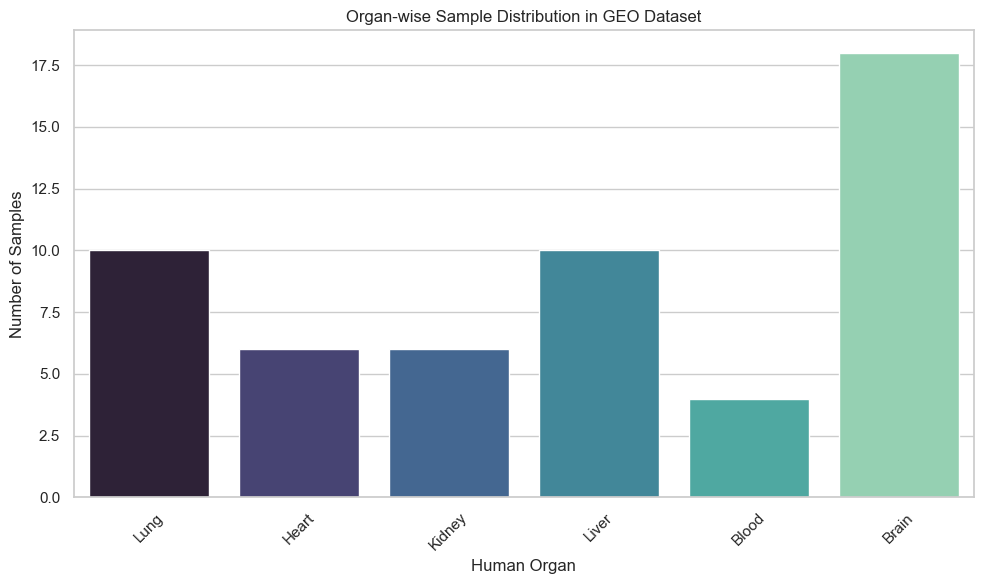

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
organs = list(organ_counts.keys())
counts = list(organ_counts.values())

# Plot setup
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=organs, y=counts, palette="mako")

# Add labels and title
plt.xlabel("Human Organ")
plt.ylabel("Number of Samples")
plt.title("Organ-wise Sample Distribution in GEO Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
!pip install Bio

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 32.8 MB/s  0:00:00

   ---------------------------------------- 0/6 [biopython]
   ---------------------------------------- 0/6 [biopython]
   ---------------------------------------- 0/6 [biopython]
   ---------------------------------------- 0/6 [biopython]
   ---------------------------------------- 0/6 [biopython]
   ---------------------------------------- 0/6 [biopython]
   -------------------- ------------------- 3/6 [biothings-client]
   ---------------------------------------- 6/6 [Bio]



In [13]:
from Bio import Entrez
Entrez.email = "skatale@umich.edu"

handle = Entrez.esearch(db="gds", term="bulk RNA-seq AND Homo sapiens AND liver", retmax=10000)
record = Entrez.read(handle)
gse_ids = record["IdList"]
print("Bulk RNA-seq GSE IDs:", gse_ids)
print(len(gse_ids))

Bulk RNA-seq GSE IDs: ['200306629', '200306627', '200303855', '200291163', '200306566', '200288221', '200275813', '200304266', '200285043', '200280979', '200298173', '200298172', '200242829', '200277861', '200288433', '200253430', '200253429', '200292324', '200281759', '200291046', '200274701', '200267366', '200266169', '200264201', '200298355', '200287371', '200296710', '200285364', '200267839', '200248110', '200247961', '200287953', '200239639', '200293996', '200267033', '200267032', '200267031', '200264395', '200230683', '200293127', '200295010', '200294016', '200291779', '200231717', '200292798', '200217649', '200290418', '200290417', '200285937', '200195844', '200290588', '200290587', '200288880', '200259246', '200289427', '200289025', '200255825', '200280724', '200280691', '200266919', '200190361', '200282271', '200210242', '200282660', '200255199', '200287540', '200287345', '200269521', '200285275', '200285157', '200206338', '200270736', '200269826', '200235863', '200283797', '2

In [14]:
from Bio import Entrez
import time

# Required by NCBI
Entrez.email = "your_email@example.com"

def fetch_gse_ids_by_organ(organ, max_records=10000, batch_size=500):
    """
    Fetches all GSE IDs from GEO for a given organ using Entrez API with pagination.
    """
    gse_ids = []
    for start in range(0, max_records, batch_size):
        print(f"Fetching records {start} to {start + batch_size} for organ: {organ}")
        try:
            handle = Entrez.esearch(
                db="gds",
                term=f"{organ}[Title] AND Homo sapiens[Organism] AND bulk RNA-seq",
                retstart=start,
                retmax=batch_size
            )
            record = Entrez.read(handle)
            handle.close()
            gse_ids.extend(record["IdList"])
            if len(record["IdList"]) < batch_size:
                break  # No more results
            time.sleep(0.5)  # Respect NCBI rate limits
        except Exception as e:
            print(f"Error fetching batch starting at {start}: {e}")
            break
    return gse_ids

# Example usage
human_organs = [
    "brain", "spinal cord", "cerebellum", "hypothalamus", "pituitary gland",
    "heart", "lungs", "trachea", "bronchi", "diaphragm", "nasal cavity", "larynx", "pharynx",
    "mouth", "tongue", "teeth", "salivary glands", "esophagus", "stomach",
    "duodenum", "jejunum", "ileum", "colon", "rectum", "liver", "gallbladder", "pancreas", "anus",
    "thyroid", "parathyroid glands", "adrenal glands", "pineal gland",
    "spleen", "lymph nodes", "thymus", "tonsils", "bone marrow",
    "kidneys", "ureters", "bladder", "urethra",
    "skin", "hair", "nails", "subcutaneous tissue",
    "bones", "joints", "ligaments", "tendons",
    "ovaries", "uterus", "fallopian tubes", "vagina",
    "testes", "prostate", "penis", "scrotum", "seminal vesicles", "bulbourethral glands",
    "skeletal muscles", "smooth muscles", "cardiac muscle",
    "blood vessels"
]

for organ
gse_list = fetch_gse_ids_by_organ(organ)
print(f"Total GSEs found for {organ}: {len(gse_list)}")
print(gse_list)

Fetching records 0 to 500 for organ: liver
Total GSEs found for liver: 110
['200277861', '200253430', '200253429', '200267031', '200231717', '200217649', '200255825', '200282660', '200287540', '200270736', '200235863', '200224153', '200232374', '200243887', '200261432', '200255163', '200193534', '200204958', '200243245', '200218472', '200188391', '200226562', '200228941', '200221240', '200214583', '200222273', '200189600', '200186027', '200196043', '200162908', '200210058', '200162616', '200211103', '200197409', '200193248', '200182917', '200182297', '200169084', '200161928', '200158485', '200149180', '200129457', '200097367', '200065364', '200017312', '307510959', '307510958', '307510957', '307510956', '307510955', '307510953', '307510952', '307510951', '307510950', '307510949', '307510948', '307510947', '307510946', '307510945', '307510944', '307329595', '307329594', '307329593', '307329592', '307329591', '307329590', '307329589', '307329588', '307329587', '307329586', '307329585', '

In [16]:
from Bio import Entrez
import GEOparse
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import time

Entrez.email = "your_email@example.com"  # Replace with your email

# Define organ keywords for matching
organ_keywords = {
    "liver": "Liver", "brain": "Brain", "lung": "Lung", "kidney": "Kidney",
    "heart": "Heart", "blood": "Blood", "skin": "Skin", "pancreas": "Pancreas"
}

# Step 1: Search GDS and extract valid GSE IDs

def fetch_gse_ids_from_gds(organ, max_records=10000):
    gse_ids = []
    try:
        # Search GDS entries with bulk RNA-seq filter
        handle = Entrez.esearch(
            db="gds",
            term=f'{organ} AND "Homo sapiens"[Organism] AND "expression profiling by high throughput sequencing" AND "bulk RNA-seq"',
            retmax=max_records
        )
        record = Entrez.read(handle)
        handle.close()
        gds_ids = record["IdList"]
        print(f"Total GDS_ids found for organ {organ} {len(gds_ids)}")
        
        # Heuristic conversion: GDS → GSE by slicing last 6 digits
        for gds_id in gds_ids:
            gds_str = str(gds_id)
            gse_id = f"GSE{gds_str[-6:]}"
            gse_ids.append(gse_id)
            time.sleep(0.1)  # Gentle pacing
    except Exception as e:
        print(f"Error fetching GSEs for {organ}: {e}")

    # print(f"GSE_ids found for {organ} are {gse_ids}")
    return gse_ids

# Step 2: Parse GSEs and count samples by organ
def count_samples_by_organ(gse_ids, organ_keywords):
    organ_counts = Counter()
    for gse_id in gse_ids:
        try:
            print(f"Parsing {gse_id}...")
            gse = GEOparse.get_GEO(geo=gse_id, destdir="./", how="quick")
            for gsm_name, gsm in gse.gsms.items():
                description = gsm.metadata.get("source_name_ch1", [""])[0].lower()
                for keyword, organ in organ_keywords.items():
                    if keyword in description:
                        organ_counts[organ] += 1
        except Exception as e:
            print(f"Failed to parse {gse_id}: {e}")
    return organ_counts

# Step 3: Visualize the sample counts
def plot_organ_distribution(organ_counts):
    organs = list(organ_counts.keys())
    counts = list(organ_counts.values())

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=organs, y=counts, palette="mako")

    plt.xlabel("Human Organ")
    plt.ylabel("Number of Samples")
    plt.title("Organ-wise Sample Distribution in Bulk RNA-Seq GEO Datasets")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 🔁 Run the pipeline
if __name__ == "__main__":
    all_gse_ids = []
    for organ in organ_keywords.keys():
        gse_ids = fetch_gse_ids_from_gds(organ)
        all_gse_ids.extend(gse_ids)
    print(f"count of all_gse_ids is {len(all_gse_ids)}")
    sample_counts = count_samples_by_organ(all_gse_ids, organ_keywords)
    plot_organ_distribution(sample_counts)

Total GDS_ids found for organ liver 185
Total GDS_ids found for organ brain 171
Total GDS_ids found for organ lung 100
Total GDS_ids found for organ kidney 76
Total GDS_ids found for organ heart 82
Total GDS_ids found for organ blood 500
Total GDS_ids found for organ skin 57
Total GDS_ids found for organ pancreas 43


10-Sep-2025 07:41:32 DEBUG utils - Directory ./ already exists. Skipping.
10-Sep-2025 07:41:32 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE303855&form=text&view=quick to ./GSE303855.txt


count of all_gse_ids is 1214
Parsing GSE303855...


10-Sep-2025 07:41:34 DEBUG downloader - Total size: 0
10-Sep-2025 07:41:34 DEBUG downloader - md5: None
276kB [00:01, 167kB/s] 
10-Sep-2025 07:41:36 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpk8f3bi4b to D:\Projects\GenAI-Projects\GSE303855.txt
10-Sep-2025 07:41:36 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE303855&form=text&view=quick
10-Sep-2025 07:41:36 INFO GEOparse - Parsing ./GSE303855.txt: 
10-Sep-2025 07:41:36 DEBUG GEOparse - SAMPLE: GSM9136977
10-Sep-2025 07:41:36 DEBUG GEOparse - SAMPLE: GSM9136978
10-Sep-2025 07:41:36 DEBUG GEOparse - SAMPLE: GSM9136979
10-Sep-2025 07:41:36 DEBUG GEOparse - SAMPLE: GSM9136980
10-Sep-2025 07:41:36 DEBUG GEOparse - SAMPLE: GSM9136981
10-Sep-2025 07:41:36 DEBUG GEOparse - SAMPLE: GSM9136982
10-Sep-2025 07:41:36 DEBUG GEOparse - SAMPLE: GSM9136983
10-Sep-2025 07:41:36 DEBUG GEOparse - SAMPLE: GSM9136984
10-Sep-2025 07:41:36 DEBUG GEOparse - SAMPLE: GSM9136985
10-Se

Parsing GSE304266...


10-Sep-2025 07:41:36 DEBUG downloader - Total size: 0
10-Sep-2025 07:41:36 DEBUG downloader - md5: None
59.2kB [00:00, 106kB/s]
10-Sep-2025 07:41:37 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpk68diec4 to D:\Projects\GenAI-Projects\GSE304266.txt
10-Sep-2025 07:41:37 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE304266&form=text&view=quick
10-Sep-2025 07:41:37 INFO GEOparse - Parsing ./GSE304266.txt: 
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM9146428
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM9146429
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM9146430
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM9146431
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM9146432
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM9146433
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM9146434
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM9146435
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM9146436
10-Se

Parsing GSE285043...


10-Sep-2025 07:41:37 DEBUG downloader - Total size: 0
10-Sep-2025 07:41:37 DEBUG downloader - md5: None
31.0kB [00:00, 146kB/s]
10-Sep-2025 07:41:37 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp4v8vanea to D:\Projects\GenAI-Projects\GSE285043.txt
10-Sep-2025 07:41:37 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE285043&form=text&view=quick
10-Sep-2025 07:41:37 INFO GEOparse - Parsing ./GSE285043.txt: 
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM8695699
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM8695700
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM8695701
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM8695702
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM8695703
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM8695704
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM8695705
10-Sep-2025 07:41:37 DEBUG GEOparse - SAMPLE: GSM8695706
10-Sep-2025 07:41:37 DEBUG utils - Directory ./ already exists

Parsing GSE280979...


10-Sep-2025 07:41:38 DEBUG downloader - Total size: 0
10-Sep-2025 07:41:38 DEBUG downloader - md5: None
42.8kB [00:00, 148kB/s]
10-Sep-2025 07:41:38 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp81yencqb to D:\Projects\GenAI-Projects\GSE280979.txt
10-Sep-2025 07:41:38 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE280979&form=text&view=quick
10-Sep-2025 07:41:38 INFO GEOparse - Parsing ./GSE280979.txt: 
10-Sep-2025 07:41:38 DEBUG GEOparse - SAMPLE: GSM8608270
10-Sep-2025 07:41:38 DEBUG GEOparse - SAMPLE: GSM8608271
10-Sep-2025 07:41:38 DEBUG GEOparse - SAMPLE: GSM8608272
10-Sep-2025 07:41:38 DEBUG GEOparse - SAMPLE: GSM8608273
10-Sep-2025 07:41:38 DEBUG GEOparse - SAMPLE: GSM8608274
10-Sep-2025 07:41:38 DEBUG GEOparse - SAMPLE: GSM8608275
10-Sep-2025 07:41:38 DEBUG GEOparse - SAMPLE: GSM8608276
10-Sep-2025 07:41:38 DEBUG GEOparse - SAMPLE: GSM8608277
10-Sep-2025 07:41:38 DEBUG GEOparse - SAMPLE: GSM8608278
10-Se

Parsing GSE242829...


10-Sep-2025 07:41:40 DEBUG downloader - Total size: 0
10-Sep-2025 07:41:40 DEBUG downloader - md5: None
150kB [00:02, 59.9kB/s] 
10-Sep-2025 07:41:42 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpbz81pr38 to D:\Projects\GenAI-Projects\GSE242829.txt
10-Sep-2025 07:41:42 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE242829&form=text&view=quick
10-Sep-2025 07:41:42 INFO GEOparse - Parsing ./GSE242829.txt: 
10-Sep-2025 07:41:42 DEBUG GEOparse - SAMPLE: GSM7771602
10-Sep-2025 07:41:42 DEBUG GEOparse - SAMPLE: GSM7771603
10-Sep-2025 07:41:42 DEBUG GEOparse - SAMPLE: GSM7771604
10-Sep-2025 07:41:42 DEBUG GEOparse - SAMPLE: GSM7771605
10-Sep-2025 07:41:42 DEBUG GEOparse - SAMPLE: GSM7771606
10-Sep-2025 07:41:42 DEBUG GEOparse - SAMPLE: GSM7771607
10-Sep-2025 07:41:42 DEBUG GEOparse - SAMPLE: GSM7771608
10-Sep-2025 07:41:42 DEBUG GEOparse - SAMPLE: GSM7771609
10-Sep-2025 07:41:42 DEBUG GEOparse - SAMPLE: GSM7771610
10-S

Parsing GSE277861...


10-Sep-2025 07:41:44 DEBUG downloader - Total size: 0
10-Sep-2025 07:41:44 DEBUG downloader - md5: None
154kB [00:03, 40.3kB/s] 
10-Sep-2025 07:41:48 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpqgfpqz1q to D:\Projects\GenAI-Projects\GSE277861.txt
10-Sep-2025 07:41:48 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE277861&form=text&view=quick
10-Sep-2025 07:41:48 INFO GEOparse - Parsing ./GSE277861.txt: 
10-Sep-2025 07:41:48 DEBUG GEOparse - SAMPLE: GSM8533519
10-Sep-2025 07:41:48 DEBUG GEOparse - SAMPLE: GSM8533520
10-Sep-2025 07:41:48 DEBUG GEOparse - SAMPLE: GSM8533521
10-Sep-2025 07:41:48 DEBUG GEOparse - SAMPLE: GSM8533522
10-Sep-2025 07:41:48 DEBUG GEOparse - SAMPLE: GSM8533523
10-Sep-2025 07:41:48 DEBUG GEOparse - SAMPLE: GSM8533524
10-Sep-2025 07:41:48 DEBUG GEOparse - SAMPLE: GSM8533525
10-Sep-2025 07:41:48 DEBUG GEOparse - SAMPLE: GSM8533526
10-Sep-2025 07:41:48 DEBUG GEOparse - SAMPLE: GSM8533527
10-S

Parsing GSE291046...


10-Sep-2025 07:41:48 DEBUG downloader - Total size: 0
10-Sep-2025 07:41:48 DEBUG downloader - md5: None
63.6kB [00:00, 129kB/s]
10-Sep-2025 07:41:49 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpov2k86co to D:\Projects\GenAI-Projects\GSE291046.txt
10-Sep-2025 07:41:49 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE291046&form=text&view=quick
10-Sep-2025 07:41:49 INFO GEOparse - Parsing ./GSE291046.txt: 
10-Sep-2025 07:41:49 DEBUG GEOparse - SAMPLE: GSM8828001
10-Sep-2025 07:41:49 DEBUG GEOparse - SAMPLE: GSM8828002
10-Sep-2025 07:41:49 DEBUG GEOparse - SAMPLE: GSM8828003
10-Sep-2025 07:41:49 DEBUG GEOparse - SAMPLE: GSM8828004
10-Sep-2025 07:41:49 DEBUG GEOparse - SAMPLE: GSM8828005
10-Sep-2025 07:41:49 DEBUG GEOparse - SAMPLE: GSM8828006
10-Sep-2025 07:41:49 DEBUG GEOparse - SAMPLE: GSM8828007
10-Sep-2025 07:41:49 DEBUG GEOparse - SAMPLE: GSM8828008
10-Sep-2025 07:41:49 DEBUG GEOparse - SAMPLE: GSM8828009
10-Se

Parsing GSE267366...


10-Sep-2025 07:41:49 DEBUG downloader - Total size: 0
10-Sep-2025 07:41:49 DEBUG downloader - md5: None
178kB [00:02, 78.7kB/s] 
10-Sep-2025 07:41:52 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpjasuazgo to D:\Projects\GenAI-Projects\GSE267366.txt
10-Sep-2025 07:41:52 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE267366&form=text&view=quick
10-Sep-2025 07:41:52 INFO GEOparse - Parsing ./GSE267366.txt: 
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8264711
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8264712
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8264713
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8264714
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8264715
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8264716
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8264717
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8264718
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8264719
10-S

Parsing GSE266169...


10-Sep-2025 07:41:52 DEBUG downloader - Total size: 0
10-Sep-2025 07:41:52 DEBUG downloader - md5: None
51.9kB [00:00, 140kB/s]
10-Sep-2025 07:41:52 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp0rug56s0 to D:\Projects\GenAI-Projects\GSE266169.txt
10-Sep-2025 07:41:52 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE266169&form=text&view=quick
10-Sep-2025 07:41:52 INFO GEOparse - Parsing ./GSE266169.txt: 
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8213924
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8213925
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8213926
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8213927
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8213928
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8213929
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8218095
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8218096
10-Sep-2025 07:41:52 DEBUG GEOparse - SAMPLE: GSM8218097
10-Se

Parsing GSE264201...


10-Sep-2025 07:41:53 DEBUG downloader - Total size: 0
10-Sep-2025 07:41:53 DEBUG downloader - md5: None
19.6kB [00:01, 12.5kB/s]
10-Sep-2025 07:41:54 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp6jj59eo5 to D:\Projects\GenAI-Projects\GSE264201.txt
10-Sep-2025 07:41:54 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE264201&form=text&view=quick
10-Sep-2025 07:41:54 INFO GEOparse - Parsing ./GSE264201.txt: 
10-Sep-2025 07:41:54 DEBUG GEOparse - SAMPLE: GSM8213924
10-Sep-2025 07:41:54 DEBUG GEOparse - SAMPLE: GSM8213925
10-Sep-2025 07:41:54 DEBUG GEOparse - SAMPLE: GSM8213926
10-Sep-2025 07:41:54 DEBUG GEOparse - SAMPLE: GSM8213927
10-Sep-2025 07:41:54 DEBUG GEOparse - SAMPLE: GSM8213928
10-Sep-2025 07:41:54 DEBUG GEOparse - SAMPLE: GSM8213929
10-Sep-2025 07:41:54 DEBUG utils - Directory ./ already exists. Skipping.
10-Sep-2025 07:41:54 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=g

Parsing GSE287371...


10-Sep-2025 07:41:55 DEBUG downloader - Total size: 0
10-Sep-2025 07:41:55 DEBUG downloader - md5: None
57.2kB [00:01, 50.0kB/s]
10-Sep-2025 07:41:56 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp4v1mv45c to D:\Projects\GenAI-Projects\GSE287371.txt
10-Sep-2025 07:41:56 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE287371&form=text&view=quick
10-Sep-2025 07:41:56 INFO GEOparse - Parsing ./GSE287371.txt: 
10-Sep-2025 07:41:56 DEBUG GEOparse - SAMPLE: GSM8744978
10-Sep-2025 07:41:56 DEBUG GEOparse - SAMPLE: GSM8744979
10-Sep-2025 07:41:56 DEBUG GEOparse - SAMPLE: GSM8744980
10-Sep-2025 07:41:56 DEBUG GEOparse - SAMPLE: GSM8744981
10-Sep-2025 07:41:56 DEBUG GEOparse - SAMPLE: GSM8744982
10-Sep-2025 07:41:56 DEBUG GEOparse - SAMPLE: GSM8744983
10-Sep-2025 07:41:56 DEBUG GEOparse - SAMPLE: GSM8744984
10-Sep-2025 07:41:56 DEBUG GEOparse - SAMPLE: GSM8744985
10-Sep-2025 07:41:56 DEBUG GEOparse - SAMPLE: GSM8744986
10-S

Parsing GSE248110...


10-Sep-2025 07:41:57 DEBUG downloader - Total size: 0
10-Sep-2025 07:41:57 DEBUG downloader - md5: None
55.0kB [00:01, 49.9kB/s]
10-Sep-2025 07:41:58 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp2rbimd9r to D:\Projects\GenAI-Projects\GSE248110.txt
10-Sep-2025 07:41:58 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE248110&form=text&view=quick
10-Sep-2025 07:41:58 INFO GEOparse - Parsing ./GSE248110.txt: 
10-Sep-2025 07:41:58 DEBUG GEOparse - SAMPLE: GSM7906026
10-Sep-2025 07:41:58 DEBUG GEOparse - SAMPLE: GSM7906027
10-Sep-2025 07:41:58 DEBUG GEOparse - SAMPLE: GSM7906028
10-Sep-2025 07:41:58 DEBUG GEOparse - SAMPLE: GSM7906029
10-Sep-2025 07:41:58 DEBUG GEOparse - SAMPLE: GSM7906030
10-Sep-2025 07:41:58 DEBUG GEOparse - SAMPLE: GSM7906031
10-Sep-2025 07:41:58 DEBUG GEOparse - SAMPLE: GSM7906032
10-Sep-2025 07:41:58 DEBUG GEOparse - SAMPLE: GSM7906033
10-Sep-2025 07:41:58 DEBUG GEOparse - SAMPLE: GSM7906034
10-S

Parsing GSE247961...


10-Sep-2025 07:41:58 DEBUG downloader - Total size: 0
10-Sep-2025 07:41:58 DEBUG downloader - md5: None
9.81kB [00:00, 111kB/s]
10-Sep-2025 07:41:58 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpfnwk8wwx to D:\Projects\GenAI-Projects\GSE247961.txt
10-Sep-2025 07:41:58 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE247961&form=text&view=quick
10-Sep-2025 07:41:58 INFO GEOparse - Parsing ./GSE247961.txt: 
10-Sep-2025 07:41:59 DEBUG GEOparse - SAMPLE: GSM7903846
10-Sep-2025 07:41:59 DEBUG GEOparse - SAMPLE: GSM8708345
10-Sep-2025 07:41:59 DEBUG GEOparse - SAMPLE: GSM8708346
10-Sep-2025 07:41:59 DEBUG GEOparse - SAMPLE: GSM8708347
10-Sep-2025 07:41:59 DEBUG utils - Directory ./ already exists. Skipping.
10-Sep-2025 07:41:59 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE267033&form=text&view=quick to ./GSE267033.txt


Parsing GSE267033...


10-Sep-2025 07:42:00 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:00 DEBUG downloader - md5: None
77.4kB [00:00, 178kB/s]
10-Sep-2025 07:42:01 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp3s27s95k to D:\Projects\GenAI-Projects\GSE267033.txt
10-Sep-2025 07:42:01 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE267033&form=text&view=quick
10-Sep-2025 07:42:01 INFO GEOparse - Parsing ./GSE267033.txt: 
10-Sep-2025 07:42:01 DEBUG GEOparse - SAMPLE: GSM8258781
10-Sep-2025 07:42:01 DEBUG GEOparse - SAMPLE: GSM8258782
10-Sep-2025 07:42:01 DEBUG GEOparse - SAMPLE: GSM8258783
10-Sep-2025 07:42:01 DEBUG GEOparse - SAMPLE: GSM8258784
10-Sep-2025 07:42:01 DEBUG GEOparse - SAMPLE: GSM8258785
10-Sep-2025 07:42:01 DEBUG GEOparse - SAMPLE: GSM8258786
10-Sep-2025 07:42:01 DEBUG GEOparse - SAMPLE: GSM8258787
10-Sep-2025 07:42:01 DEBUG GEOparse - SAMPLE: GSM8258788
10-Sep-2025 07:42:01 DEBUG GEOparse - SAMPLE: GSM8258789
10-Se

Parsing GSE267032...


10-Sep-2025 07:42:01 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:01 DEBUG downloader - md5: None
105kB [00:01, 91.6kB/s] 
10-Sep-2025 07:42:03 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpo5ug_ixf to D:\Projects\GenAI-Projects\GSE267032.txt
10-Sep-2025 07:42:03 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE267032&form=text&view=quick
10-Sep-2025 07:42:03 INFO GEOparse - Parsing ./GSE267032.txt: 
10-Sep-2025 07:42:03 DEBUG GEOparse - SAMPLE: GSM8258746
10-Sep-2025 07:42:03 DEBUG GEOparse - SAMPLE: GSM8258747
10-Sep-2025 07:42:03 DEBUG GEOparse - SAMPLE: GSM8258748
10-Sep-2025 07:42:03 DEBUG GEOparse - SAMPLE: GSM8258749
10-Sep-2025 07:42:03 DEBUG GEOparse - SAMPLE: GSM8258750
10-Sep-2025 07:42:03 DEBUG GEOparse - SAMPLE: GSM8258751
10-Sep-2025 07:42:03 DEBUG GEOparse - SAMPLE: GSM8258752
10-Sep-2025 07:42:03 DEBUG GEOparse - SAMPLE: GSM8258753
10-Sep-2025 07:42:03 DEBUG GEOparse - SAMPLE: GSM8258754
10-S

Parsing GSE267031...


10-Sep-2025 07:42:03 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:03 DEBUG downloader - md5: None
53.1kB [00:00, 84.2kB/s]
10-Sep-2025 07:42:04 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpay6y8o6n to D:\Projects\GenAI-Projects\GSE267031.txt
10-Sep-2025 07:42:04 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE267031&form=text&view=quick
10-Sep-2025 07:42:04 INFO GEOparse - Parsing ./GSE267031.txt: 
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8258728
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8258729
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8258730
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8258731
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8258732
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8258733
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8258734
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8258735
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8258736
10-S

Parsing GSE295010...


10-Sep-2025 07:42:04 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:04 DEBUG downloader - md5: None
32.8kB [00:00, 102kB/s] 
10-Sep-2025 07:42:04 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpp4kwu1xp to D:\Projects\GenAI-Projects\GSE295010.txt
10-Sep-2025 07:42:04 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE295010&form=text&view=quick
10-Sep-2025 07:42:04 INFO GEOparse - Parsing ./GSE295010.txt: 
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8940052
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8940053
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8940054
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8940055
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8940056
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8940057
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8940058
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8940059
10-Sep-2025 07:42:04 DEBUG GEOparse - SAMPLE: GSM8940060
10-S

Parsing GSE294016...


10-Sep-2025 07:42:09 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:09 DEBUG downloader - md5: None
203kB [00:06, 30.8kB/s] 
10-Sep-2025 07:42:16 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpfdji0u86 to D:\Projects\GenAI-Projects\GSE294016.txt
10-Sep-2025 07:42:16 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE294016&form=text&view=quick
10-Sep-2025 07:42:16 INFO GEOparse - Parsing ./GSE294016.txt: 
10-Sep-2025 07:42:16 DEBUG GEOparse - SAMPLE: GSM8896543
10-Sep-2025 07:42:16 DEBUG GEOparse - SAMPLE: GSM8896544
10-Sep-2025 07:42:16 DEBUG GEOparse - SAMPLE: GSM8896545
10-Sep-2025 07:42:16 DEBUG GEOparse - SAMPLE: GSM8896546
10-Sep-2025 07:42:16 DEBUG GEOparse - SAMPLE: GSM8896547
10-Sep-2025 07:42:16 DEBUG GEOparse - SAMPLE: GSM8896548
10-Sep-2025 07:42:16 DEBUG GEOparse - SAMPLE: GSM8896549
10-Sep-2025 07:42:16 DEBUG GEOparse - SAMPLE: GSM8896550
10-Sep-2025 07:42:16 DEBUG GEOparse - SAMPLE: GSM8896551
10-S

Parsing GSE292798...


10-Sep-2025 07:42:17 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:17 DEBUG downloader - md5: None
122kB [00:00, 167kB/s] 
10-Sep-2025 07:42:17 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp3dhhug47 to D:\Projects\GenAI-Projects\GSE292798.txt
10-Sep-2025 07:42:17 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE292798&form=text&view=quick
10-Sep-2025 07:42:17 INFO GEOparse - Parsing ./GSE292798.txt: 
10-Sep-2025 07:42:17 DEBUG GEOparse - SAMPLE: GSM8865466
10-Sep-2025 07:42:17 DEBUG GEOparse - SAMPLE: GSM8865467
10-Sep-2025 07:42:17 DEBUG GEOparse - SAMPLE: GSM8865468
10-Sep-2025 07:42:17 DEBUG GEOparse - SAMPLE: GSM8865469
10-Sep-2025 07:42:17 DEBUG GEOparse - SAMPLE: GSM8865470
10-Sep-2025 07:42:17 DEBUG GEOparse - SAMPLE: GSM8865471
10-Sep-2025 07:42:17 DEBUG GEOparse - SAMPLE: GSM8865472
10-Sep-2025 07:42:17 DEBUG GEOparse - SAMPLE: GSM8865473
10-Sep-2025 07:42:17 DEBUG GEOparse - SAMPLE: GSM8865474
10-Se

Parsing GSE217649...


10-Sep-2025 07:42:18 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:18 DEBUG downloader - md5: None
100kB [00:00, 113kB/s] 
10-Sep-2025 07:42:19 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmphxi_g0om to D:\Projects\GenAI-Projects\GSE217649.txt
10-Sep-2025 07:42:19 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE217649&form=text&view=quick
10-Sep-2025 07:42:19 INFO GEOparse - Parsing ./GSE217649.txt: 
10-Sep-2025 07:42:19 DEBUG GEOparse - SAMPLE: GSM6723964
10-Sep-2025 07:42:19 DEBUG GEOparse - SAMPLE: GSM6723965
10-Sep-2025 07:42:19 DEBUG GEOparse - SAMPLE: GSM6723966
10-Sep-2025 07:42:19 DEBUG GEOparse - SAMPLE: GSM6723967
10-Sep-2025 07:42:19 DEBUG GEOparse - SAMPLE: GSM6723968
10-Sep-2025 07:42:19 DEBUG GEOparse - SAMPLE: GSM6723969
10-Sep-2025 07:42:19 DEBUG GEOparse - SAMPLE: GSM6723970
10-Sep-2025 07:42:19 DEBUG GEOparse - SAMPLE: GSM6723971
10-Sep-2025 07:42:19 DEBUG GEOparse - SAMPLE: GSM6723972
10-Se

Parsing GSE195844...


10-Sep-2025 07:42:20 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:20 DEBUG downloader - md5: None
1.13MB [00:08, 132kB/s]
10-Sep-2025 07:42:29 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpc7rr852k to D:\Projects\GenAI-Projects\GSE195844.txt
10-Sep-2025 07:42:29 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE195844&form=text&view=quick
10-Sep-2025 07:42:29 INFO GEOparse - Parsing ./GSE195844.txt: 
10-Sep-2025 07:42:29 DEBUG GEOparse - SAMPLE: GSM5851936
10-Sep-2025 07:42:29 DEBUG GEOparse - SAMPLE: GSM5851937
10-Sep-2025 07:42:29 DEBUG GEOparse - SAMPLE: GSM5851938
10-Sep-2025 07:42:29 DEBUG GEOparse - SAMPLE: GSM5851939
10-Sep-2025 07:42:29 DEBUG GEOparse - SAMPLE: GSM5851940
10-Sep-2025 07:42:29 DEBUG GEOparse - SAMPLE: GSM5851941
10-Sep-2025 07:42:29 DEBUG GEOparse - SAMPLE: GSM5851942
10-Sep-2025 07:42:29 DEBUG GEOparse - SAMPLE: GSM5851943
10-Sep-2025 07:42:29 DEBUG GEOparse - SAMPLE: GSM5851944
10-Se

Parsing GSE289025...


10-Sep-2025 07:42:30 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:30 DEBUG downloader - md5: None
20.5kB [00:00, 47.0kB/s]
10-Sep-2025 07:42:30 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpp4a4nnhi to D:\Projects\GenAI-Projects\GSE289025.txt
10-Sep-2025 07:42:30 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE289025&form=text&view=quick
10-Sep-2025 07:42:30 INFO GEOparse - Parsing ./GSE289025.txt: 
10-Sep-2025 07:42:30 DEBUG GEOparse - SAMPLE: GSM8781776
10-Sep-2025 07:42:30 DEBUG GEOparse - SAMPLE: GSM8781777
10-Sep-2025 07:42:30 DEBUG GEOparse - SAMPLE: GSM8781778
10-Sep-2025 07:42:30 DEBUG GEOparse - SAMPLE: GSM8781779
10-Sep-2025 07:42:30 DEBUG GEOparse - SAMPLE: GSM8781780
10-Sep-2025 07:42:30 DEBUG GEOparse - SAMPLE: GSM8781781
10-Sep-2025 07:42:30 DEBUG GEOparse - SAMPLE: GSM8781782
10-Sep-2025 07:42:30 DEBUG GEOparse - SAMPLE: GSM8781783
10-Sep-2025 07:42:30 DEBUG utils - Directory ./ already exist

Parsing GSE255825...


10-Sep-2025 07:42:31 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:31 DEBUG downloader - md5: None
11.8kB [00:00, 63.8kB/s]
10-Sep-2025 07:42:31 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpowr0x6k1 to D:\Projects\GenAI-Projects\GSE255825.txt
10-Sep-2025 07:42:31 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE255825&form=text&view=quick
10-Sep-2025 07:42:31 INFO GEOparse - Parsing ./GSE255825.txt: 
10-Sep-2025 07:42:31 DEBUG GEOparse - SAMPLE: GSM8080527
10-Sep-2025 07:42:31 DEBUG GEOparse - SAMPLE: GSM8080528
10-Sep-2025 07:42:31 DEBUG GEOparse - SAMPLE: GSM8080529
10-Sep-2025 07:42:31 DEBUG GEOparse - SAMPLE: GSM8080530
10-Sep-2025 07:42:31 DEBUG GEOparse - SAMPLE: GSM8080531
10-Sep-2025 07:42:31 DEBUG utils - Directory ./ already exists. Skipping.
10-Sep-2025 07:42:31 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE282660&form=text&view=quick to ./GSE282660.txt


Parsing GSE282660...


10-Sep-2025 07:42:31 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:31 DEBUG downloader - md5: None
134kB [00:01, 112kB/s]  
10-Sep-2025 07:42:33 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmphkh9522i to D:\Projects\GenAI-Projects\GSE282660.txt
10-Sep-2025 07:42:33 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE282660&form=text&view=quick
10-Sep-2025 07:42:33 INFO GEOparse - Parsing ./GSE282660.txt: 
10-Sep-2025 07:42:33 DEBUG GEOparse - SAMPLE: GSM8648415
10-Sep-2025 07:42:33 DEBUG GEOparse - SAMPLE: GSM8648416
10-Sep-2025 07:42:33 DEBUG GEOparse - SAMPLE: GSM8648417
10-Sep-2025 07:42:33 DEBUG GEOparse - SAMPLE: GSM8648418
10-Sep-2025 07:42:33 DEBUG GEOparse - SAMPLE: GSM8648419
10-Sep-2025 07:42:33 DEBUG GEOparse - SAMPLE: GSM8648420
10-Sep-2025 07:42:33 DEBUG GEOparse - SAMPLE: GSM8648421
10-Sep-2025 07:42:33 DEBUG GEOparse - SAMPLE: GSM8648422
10-Sep-2025 07:42:33 DEBUG GEOparse - SAMPLE: GSM8648423
10-S

Parsing GSE287540...


10-Sep-2025 07:42:33 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:33 DEBUG downloader - md5: None
393kB [00:04, 98.3kB/s]
10-Sep-2025 07:42:37 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp9bbe6z5m to D:\Projects\GenAI-Projects\GSE287540.txt
10-Sep-2025 07:42:37 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE287540&form=text&view=quick
10-Sep-2025 07:42:37 INFO GEOparse - Parsing ./GSE287540.txt: 
10-Sep-2025 07:42:37 DEBUG GEOparse - SAMPLE: GSM8747284
10-Sep-2025 07:42:37 DEBUG GEOparse - SAMPLE: GSM8747285
10-Sep-2025 07:42:37 DEBUG GEOparse - SAMPLE: GSM8747286
10-Sep-2025 07:42:37 DEBUG GEOparse - SAMPLE: GSM8747287
10-Sep-2025 07:42:37 DEBUG GEOparse - SAMPLE: GSM8747288
10-Sep-2025 07:42:37 DEBUG GEOparse - SAMPLE: GSM8747289
10-Sep-2025 07:42:37 DEBUG GEOparse - SAMPLE: GSM8747290
10-Sep-2025 07:42:37 DEBUG GEOparse - SAMPLE: GSM8747291
10-Sep-2025 07:42:37 DEBUG GEOparse - SAMPLE: GSM8747292
10-Se

Parsing GSE269521...


10-Sep-2025 07:42:38 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:38 DEBUG downloader - md5: None
37.8kB [00:00, 195kB/s]
10-Sep-2025 07:42:38 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpmtdakm46 to D:\Projects\GenAI-Projects\GSE269521.txt
10-Sep-2025 07:42:38 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE269521&form=text&view=quick
10-Sep-2025 07:42:38 INFO GEOparse - Parsing ./GSE269521.txt: 
10-Sep-2025 07:42:38 DEBUG GEOparse - SAMPLE: GSM8318243
10-Sep-2025 07:42:38 DEBUG GEOparse - SAMPLE: GSM8318244
10-Sep-2025 07:42:38 DEBUG GEOparse - SAMPLE: GSM8318245
10-Sep-2025 07:42:38 DEBUG GEOparse - SAMPLE: GSM8318246
10-Sep-2025 07:42:38 DEBUG GEOparse - SAMPLE: GSM8318247
10-Sep-2025 07:42:38 DEBUG GEOparse - SAMPLE: GSM8318248
10-Sep-2025 07:42:38 DEBUG GEOparse - SAMPLE: GSM8318249
10-Sep-2025 07:42:38 DEBUG GEOparse - SAMPLE: GSM8318250
10-Sep-2025 07:42:38 DEBUG utils - Directory ./ already exists

Parsing GSE285157...


10-Sep-2025 07:42:39 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:39 DEBUG downloader - md5: None
49.9kB [00:00, 130kB/s]
10-Sep-2025 07:42:39 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp6oeknshq to D:\Projects\GenAI-Projects\GSE285157.txt
10-Sep-2025 07:42:39 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE285157&form=text&view=quick
10-Sep-2025 07:42:39 INFO GEOparse - Parsing ./GSE285157.txt: 
10-Sep-2025 07:42:39 DEBUG GEOparse - SAMPLE: GSM8697447
10-Sep-2025 07:42:39 DEBUG GEOparse - SAMPLE: GSM8697448
10-Sep-2025 07:42:39 DEBUG GEOparse - SAMPLE: GSM8697449
10-Sep-2025 07:42:39 DEBUG GEOparse - SAMPLE: GSM8697450
10-Sep-2025 07:42:39 DEBUG GEOparse - SAMPLE: GSM8697451
10-Sep-2025 07:42:39 DEBUG GEOparse - SAMPLE: GSM8697452
10-Sep-2025 07:42:39 DEBUG GEOparse - SAMPLE: GSM8697453
10-Sep-2025 07:42:39 DEBUG GEOparse - SAMPLE: GSM8697454
10-Sep-2025 07:42:39 DEBUG GEOparse - SAMPLE: GSM8697455
10-Se

Parsing GSE269826...


10-Sep-2025 07:42:40 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:40 DEBUG downloader - md5: None
325kB [00:02, 121kB/s] 
10-Sep-2025 07:42:43 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp0vi2xrc0 to D:\Projects\GenAI-Projects\GSE269826.txt
10-Sep-2025 07:42:43 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE269826&form=text&view=quick
10-Sep-2025 07:42:43 INFO GEOparse - Parsing ./GSE269826.txt: 
10-Sep-2025 07:42:43 DEBUG GEOparse - SAMPLE: GSM8328549
10-Sep-2025 07:42:43 DEBUG GEOparse - SAMPLE: GSM8328550
10-Sep-2025 07:42:43 DEBUG GEOparse - SAMPLE: GSM8328551
10-Sep-2025 07:42:43 DEBUG GEOparse - SAMPLE: GSM8328552
10-Sep-2025 07:42:43 DEBUG GEOparse - SAMPLE: GSM8328553
10-Sep-2025 07:42:43 DEBUG GEOparse - SAMPLE: GSM8328554
10-Sep-2025 07:42:43 DEBUG GEOparse - SAMPLE: GSM8328555
10-Sep-2025 07:42:43 DEBUG GEOparse - SAMPLE: GSM8328556
10-Sep-2025 07:42:43 DEBUG GEOparse - SAMPLE: GSM8328557
10-Se

Parsing GSE235863...


10-Sep-2025 07:42:43 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:43 DEBUG downloader - md5: None
431kB [00:02, 208kB/s] 
10-Sep-2025 07:42:45 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpgo5e187c to D:\Projects\GenAI-Projects\GSE235863.txt
10-Sep-2025 07:42:46 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE235863&form=text&view=quick
10-Sep-2025 07:42:46 INFO GEOparse - Parsing ./GSE235863.txt: 
10-Sep-2025 07:42:46 DEBUG GEOparse - SAMPLE: GSM7510899
10-Sep-2025 07:42:46 DEBUG GEOparse - SAMPLE: GSM7510900
10-Sep-2025 07:42:46 DEBUG GEOparse - SAMPLE: GSM7510901
10-Sep-2025 07:42:46 DEBUG GEOparse - SAMPLE: GSM7510902
10-Sep-2025 07:42:46 DEBUG GEOparse - SAMPLE: GSM7510903
10-Sep-2025 07:42:46 DEBUG GEOparse - SAMPLE: GSM7510904
10-Sep-2025 07:42:46 DEBUG GEOparse - SAMPLE: GSM7510905
10-Sep-2025 07:42:46 DEBUG GEOparse - SAMPLE: GSM7510906
10-Sep-2025 07:42:46 DEBUG GEOparse - SAMPLE: GSM7510907
10-Se

Parsing GSE283451...


10-Sep-2025 07:42:46 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:46 DEBUG downloader - md5: None
71.7kB [00:00, 154kB/s]
10-Sep-2025 07:42:46 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpy3h9eehd to D:\Projects\GenAI-Projects\GSE283451.txt
10-Sep-2025 07:42:47 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE283451&form=text&view=quick
10-Sep-2025 07:42:47 INFO GEOparse - Parsing ./GSE283451.txt: 
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8662632
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8662633
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8662634
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8662635
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8662636
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8662637
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8662638
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8662639
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8662640
10-Se

Parsing GSE281915...


10-Sep-2025 07:42:47 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:47 DEBUG downloader - md5: None
21.0kB [00:00, 256kB/s]
10-Sep-2025 07:42:47 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp_pi2wq1h to D:\Projects\GenAI-Projects\GSE281915.txt
10-Sep-2025 07:42:47 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE281915&form=text&view=quick
10-Sep-2025 07:42:47 INFO GEOparse - Parsing ./GSE281915.txt: 
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8632177
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8632178
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8632179
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8632180
10-Sep-2025 07:42:47 DEBUG utils - Directory ./ already exists. Skipping.
10-Sep-2025 07:42:47 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE277985&form=text&view=quick to ./GSE277985.txt


Parsing GSE277985...


10-Sep-2025 07:42:47 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:47 DEBUG downloader - md5: None
22.7kB [00:00, 151kB/s]
10-Sep-2025 07:42:47 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpd_wbnxdu to D:\Projects\GenAI-Projects\GSE277985.txt
10-Sep-2025 07:42:47 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE277985&form=text&view=quick
10-Sep-2025 07:42:47 INFO GEOparse - Parsing ./GSE277985.txt: 
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8536765
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8536766
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8536767
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8536768
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8536769
10-Sep-2025 07:42:47 DEBUG GEOparse - SAMPLE: GSM8536770
10-Sep-2025 07:42:47 DEBUG utils - Directory ./ already exists. Skipping.
10-Sep-2025 07:42:47 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gs

Parsing GSE245351...


10-Sep-2025 07:42:48 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:48 DEBUG downloader - md5: None
48.4kB [00:00, 94.5kB/s]
10-Sep-2025 07:42:48 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp7jme1dx3 to D:\Projects\GenAI-Projects\GSE245351.txt
10-Sep-2025 07:42:48 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE245351&form=text&view=quick
10-Sep-2025 07:42:48 INFO GEOparse - Parsing ./GSE245351.txt: 
10-Sep-2025 07:42:48 DEBUG GEOparse - SAMPLE: GSM7841233
10-Sep-2025 07:42:48 DEBUG GEOparse - SAMPLE: GSM7841234
10-Sep-2025 07:42:48 DEBUG GEOparse - SAMPLE: GSM7841235
10-Sep-2025 07:42:48 DEBUG GEOparse - SAMPLE: GSM7841236
10-Sep-2025 07:42:48 DEBUG GEOparse - SAMPLE: GSM7841237
10-Sep-2025 07:42:48 DEBUG GEOparse - SAMPLE: GSM7841238
10-Sep-2025 07:42:48 DEBUG GEOparse - SAMPLE: GSM7841239
10-Sep-2025 07:42:48 DEBUG GEOparse - SAMPLE: GSM7841240
10-Sep-2025 07:42:48 DEBUG GEOparse - SAMPLE: GSM7841241
10-S

Parsing GSE279187...


10-Sep-2025 07:42:49 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:49 DEBUG downloader - md5: None
577kB [00:06, 97.4kB/s] 
10-Sep-2025 07:42:55 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpvaqtdhsr to D:\Projects\GenAI-Projects\GSE279187.txt
10-Sep-2025 07:42:55 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE279187&form=text&view=quick
10-Sep-2025 07:42:55 INFO GEOparse - Parsing ./GSE279187.txt: 
10-Sep-2025 07:42:55 DEBUG GEOparse - SAMPLE: GSM8563774
10-Sep-2025 07:42:55 DEBUG GEOparse - SAMPLE: GSM8563775
10-Sep-2025 07:42:55 DEBUG GEOparse - SAMPLE: GSM8563776
10-Sep-2025 07:42:55 DEBUG GEOparse - SAMPLE: GSM8563777
10-Sep-2025 07:42:55 DEBUG GEOparse - SAMPLE: GSM8563778
10-Sep-2025 07:42:55 DEBUG GEOparse - SAMPLE: GSM8563779
10-Sep-2025 07:42:55 DEBUG GEOparse - SAMPLE: GSM8563780
10-Sep-2025 07:42:55 DEBUG GEOparse - SAMPLE: GSM8563781
10-Sep-2025 07:42:55 DEBUG GEOparse - SAMPLE: GSM8563782
10-S

Parsing GSE205154...


10-Sep-2025 07:42:57 DEBUG downloader - Total size: 0
10-Sep-2025 07:42:57 DEBUG downloader - md5: None
1.14MB [00:10, 111kB/s]
10-Sep-2025 07:43:08 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmph8c5055s to D:\Projects\GenAI-Projects\GSE205154.txt
10-Sep-2025 07:43:08 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE205154&form=text&view=quick
10-Sep-2025 07:43:08 INFO GEOparse - Parsing ./GSE205154.txt: 
10-Sep-2025 07:43:08 DEBUG GEOparse - SAMPLE: GSM6206002
10-Sep-2025 07:43:08 DEBUG GEOparse - SAMPLE: GSM6206003
10-Sep-2025 07:43:08 DEBUG GEOparse - SAMPLE: GSM6206004
10-Sep-2025 07:43:08 DEBUG GEOparse - SAMPLE: GSM6206005
10-Sep-2025 07:43:08 DEBUG GEOparse - SAMPLE: GSM6206006
10-Sep-2025 07:43:08 DEBUG GEOparse - SAMPLE: GSM6206007
10-Sep-2025 07:43:08 DEBUG GEOparse - SAMPLE: GSM6206008
10-Sep-2025 07:43:08 DEBUG GEOparse - SAMPLE: GSM6206009
10-Sep-2025 07:43:08 DEBUG GEOparse - SAMPLE: GSM6206010
10-Se

Parsing GSE255991...


10-Sep-2025 07:43:10 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:10 DEBUG downloader - md5: None
76.5kB [00:00, 186kB/s]
10-Sep-2025 07:43:11 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp1hvgdv74 to D:\Projects\GenAI-Projects\GSE255991.txt
10-Sep-2025 07:43:11 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE255991&form=text&view=quick
10-Sep-2025 07:43:11 INFO GEOparse - Parsing ./GSE255991.txt: 
10-Sep-2025 07:43:11 DEBUG GEOparse - SAMPLE: GSM8083887
10-Sep-2025 07:43:11 DEBUG GEOparse - SAMPLE: GSM8083888
10-Sep-2025 07:43:11 DEBUG GEOparse - SAMPLE: GSM8083889
10-Sep-2025 07:43:11 DEBUG GEOparse - SAMPLE: GSM8083890
10-Sep-2025 07:43:11 DEBUG GEOparse - SAMPLE: GSM8083891
10-Sep-2025 07:43:11 DEBUG GEOparse - SAMPLE: GSM8083892
10-Sep-2025 07:43:11 DEBUG GEOparse - SAMPLE: GSM8083893
10-Sep-2025 07:43:11 DEBUG GEOparse - SAMPLE: GSM8083894
10-Sep-2025 07:43:11 DEBUG GEOparse - SAMPLE: GSM8083895
10-Se

Parsing GSE224153...


10-Sep-2025 07:43:12 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:12 DEBUG downloader - md5: None
73.4kB [00:01, 37.7kB/s]
10-Sep-2025 07:43:14 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpgvilt1og to D:\Projects\GenAI-Projects\GSE224153.txt
10-Sep-2025 07:43:14 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE224153&form=text&view=quick
10-Sep-2025 07:43:14 INFO GEOparse - Parsing ./GSE224153.txt: 
10-Sep-2025 07:43:14 DEBUG GEOparse - SAMPLE: GSM7016778
10-Sep-2025 07:43:14 DEBUG GEOparse - SAMPLE: GSM7016779
10-Sep-2025 07:43:14 DEBUG GEOparse - SAMPLE: GSM7016780
10-Sep-2025 07:43:14 DEBUG GEOparse - SAMPLE: GSM7016781
10-Sep-2025 07:43:14 DEBUG GEOparse - SAMPLE: GSM7016782
10-Sep-2025 07:43:14 DEBUG GEOparse - SAMPLE: GSM7016783
10-Sep-2025 07:43:14 DEBUG GEOparse - SAMPLE: GSM7016784
10-Sep-2025 07:43:14 DEBUG GEOparse - SAMPLE: GSM7016785
10-Sep-2025 07:43:14 DEBUG GEOparse - SAMPLE: GSM7016786
10-S

Parsing GSE274172...


10-Sep-2025 07:43:14 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:14 DEBUG downloader - md5: None
15.6kB [00:00, 87.7kB/s]
10-Sep-2025 07:43:14 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpguzvw92q to D:\Projects\GenAI-Projects\GSE274172.txt
10-Sep-2025 07:43:14 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE274172&form=text&view=quick
10-Sep-2025 07:43:14 INFO GEOparse - Parsing ./GSE274172.txt: 
10-Sep-2025 07:43:14 DEBUG GEOparse - SAMPLE: GSM8444628
10-Sep-2025 07:43:14 DEBUG GEOparse - SAMPLE: GSM8444629
10-Sep-2025 07:43:14 DEBUG GEOparse - SAMPLE: GSM8444630
10-Sep-2025 07:43:14 DEBUG GEOparse - SAMPLE: GSM8444631
10-Sep-2025 07:43:14 DEBUG utils - Directory ./ already exists. Skipping.
10-Sep-2025 07:43:14 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE273561&form=text&view=quick to ./GSE273561.txt


Parsing GSE273561...


10-Sep-2025 07:43:17 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:17 DEBUG downloader - md5: None
89.8kB [00:00, 113kB/s]
10-Sep-2025 07:43:18 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpqqo6t4fk to D:\Projects\GenAI-Projects\GSE273561.txt
10-Sep-2025 07:43:18 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE273561&form=text&view=quick
10-Sep-2025 07:43:18 INFO GEOparse - Parsing ./GSE273561.txt: 
10-Sep-2025 07:43:18 DEBUG GEOparse - SAMPLE: GSM8432342
10-Sep-2025 07:43:18 DEBUG GEOparse - SAMPLE: GSM8432343
10-Sep-2025 07:43:18 DEBUG GEOparse - SAMPLE: GSM8432344
10-Sep-2025 07:43:18 DEBUG GEOparse - SAMPLE: GSM8432345
10-Sep-2025 07:43:18 DEBUG GEOparse - SAMPLE: GSM8432346
10-Sep-2025 07:43:18 DEBUG GEOparse - SAMPLE: GSM8432347
10-Sep-2025 07:43:18 DEBUG GEOparse - SAMPLE: GSM8432348
10-Sep-2025 07:43:18 DEBUG GEOparse - SAMPLE: GSM8432349
10-Sep-2025 07:43:18 DEBUG GEOparse - SAMPLE: GSM8432350
10-Se

Parsing GSE232374...


10-Sep-2025 07:43:18 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:19 DEBUG downloader - md5: None
56.2kB [00:00, 75.1kB/s]
10-Sep-2025 07:43:19 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp7gw7p2g4 to D:\Projects\GenAI-Projects\GSE232374.txt
10-Sep-2025 07:43:19 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE232374&form=text&view=quick
10-Sep-2025 07:43:19 INFO GEOparse - Parsing ./GSE232374.txt: 
10-Sep-2025 07:43:19 DEBUG GEOparse - SAMPLE: GSM7329578
10-Sep-2025 07:43:19 DEBUG GEOparse - SAMPLE: GSM7329579
10-Sep-2025 07:43:19 DEBUG GEOparse - SAMPLE: GSM7329580
10-Sep-2025 07:43:19 DEBUG GEOparse - SAMPLE: GSM7329581
10-Sep-2025 07:43:19 DEBUG GEOparse - SAMPLE: GSM7329582
10-Sep-2025 07:43:19 DEBUG GEOparse - SAMPLE: GSM7329583
10-Sep-2025 07:43:19 DEBUG GEOparse - SAMPLE: GSM7329584
10-Sep-2025 07:43:19 DEBUG GEOparse - SAMPLE: GSM7329585
10-Sep-2025 07:43:19 DEBUG GEOparse - SAMPLE: GSM7329586
10-S

Parsing GSE245608...


10-Sep-2025 07:43:20 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:20 DEBUG downloader - md5: None
113kB [00:01, 78.4kB/s] 
10-Sep-2025 07:43:21 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpdf0wzpfr to D:\Projects\GenAI-Projects\GSE245608.txt
10-Sep-2025 07:43:21 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE245608&form=text&view=quick
10-Sep-2025 07:43:21 INFO GEOparse - Parsing ./GSE245608.txt: 
10-Sep-2025 07:43:21 DEBUG GEOparse - SAMPLE: GSM7845625
10-Sep-2025 07:43:21 DEBUG GEOparse - SAMPLE: GSM7845626
10-Sep-2025 07:43:21 DEBUG GEOparse - SAMPLE: GSM7845627
10-Sep-2025 07:43:21 DEBUG GEOparse - SAMPLE: GSM7845628
10-Sep-2025 07:43:21 DEBUG GEOparse - SAMPLE: GSM7845629
10-Sep-2025 07:43:21 DEBUG GEOparse - SAMPLE: GSM7845630
10-Sep-2025 07:43:21 DEBUG GEOparse - SAMPLE: GSM7845631
10-Sep-2025 07:43:21 DEBUG GEOparse - SAMPLE: GSM7845632
10-Sep-2025 07:43:21 DEBUG GEOparse - SAMPLE: GSM7845633
10-S

Parsing GSE261337...


10-Sep-2025 07:43:22 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:22 DEBUG downloader - md5: None
38.5kB [00:00, 126kB/s]
10-Sep-2025 07:43:22 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpry1v74r3 to D:\Projects\GenAI-Projects\GSE261337.txt
10-Sep-2025 07:43:22 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE261337&form=text&view=quick
10-Sep-2025 07:43:22 INFO GEOparse - Parsing ./GSE261337.txt: 
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM8140751
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM8140752
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM8140753
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM8140754
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM8140755
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM8140756
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM8140757
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM8140758
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM8140759
10-Se

Parsing GSE234443...


10-Sep-2025 07:43:22 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:22 DEBUG downloader - md5: None
23.1kB [00:00, 146kB/s]
10-Sep-2025 07:43:22 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpnbh2yoyo to D:\Projects\GenAI-Projects\GSE234443.txt
10-Sep-2025 07:43:22 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE234443&form=text&view=quick
10-Sep-2025 07:43:22 INFO GEOparse - Parsing ./GSE234443.txt: 
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM7468691
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM7468692
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM7468693
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM7468694
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM7468695
10-Sep-2025 07:43:22 DEBUG GEOparse - SAMPLE: GSM7468696
10-Sep-2025 07:43:22 DEBUG utils - Directory ./ already exists. Skipping.
10-Sep-2025 07:43:22 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gs

Parsing GSE234444...


10-Sep-2025 07:43:23 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:23 DEBUG downloader - md5: None
36.0kB [00:00, 241kB/s]
10-Sep-2025 07:43:23 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpthi_i8jo to D:\Projects\GenAI-Projects\GSE234444.txt
10-Sep-2025 07:43:23 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE234444&form=text&view=quick
10-Sep-2025 07:43:23 INFO GEOparse - Parsing ./GSE234444.txt: 
10-Sep-2025 07:43:23 DEBUG GEOparse - SAMPLE: GSM7468687
10-Sep-2025 07:43:23 DEBUG GEOparse - SAMPLE: GSM7468688
10-Sep-2025 07:43:23 DEBUG GEOparse - SAMPLE: GSM7468689
10-Sep-2025 07:43:23 DEBUG GEOparse - SAMPLE: GSM7468690
10-Sep-2025 07:43:23 DEBUG GEOparse - SAMPLE: GSM7468691
10-Sep-2025 07:43:23 DEBUG GEOparse - SAMPLE: GSM7468692
10-Sep-2025 07:43:23 DEBUG GEOparse - SAMPLE: GSM7468693
10-Sep-2025 07:43:23 DEBUG GEOparse - SAMPLE: GSM7468694
10-Sep-2025 07:43:23 DEBUG GEOparse - SAMPLE: GSM7468695
10-Se

Parsing GSE242195...


10-Sep-2025 07:43:24 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:24 DEBUG downloader - md5: None
315kB [00:11, 28.4kB/s] 
10-Sep-2025 07:43:36 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpfyzzsqb0 to D:\Projects\GenAI-Projects\GSE242195.txt
10-Sep-2025 07:43:36 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE242195&form=text&view=quick
10-Sep-2025 07:43:36 INFO GEOparse - Parsing ./GSE242195.txt: 
10-Sep-2025 07:43:36 DEBUG GEOparse - SAMPLE: GSM7754685
10-Sep-2025 07:43:36 DEBUG GEOparse - SAMPLE: GSM7754686
10-Sep-2025 07:43:36 DEBUG GEOparse - SAMPLE: GSM7754687
10-Sep-2025 07:43:36 DEBUG GEOparse - SAMPLE: GSM7754688
10-Sep-2025 07:43:36 DEBUG GEOparse - SAMPLE: GSM7754689
10-Sep-2025 07:43:36 DEBUG GEOparse - SAMPLE: GSM7754690
10-Sep-2025 07:43:36 DEBUG GEOparse - SAMPLE: GSM7754691
10-Sep-2025 07:43:36 DEBUG GEOparse - SAMPLE: GSM7754692
10-Sep-2025 07:43:36 DEBUG GEOparse - SAMPLE: GSM7754693
10-S

Parsing GSE267021...


10-Sep-2025 07:43:36 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:36 DEBUG downloader - md5: None
54.0kB [00:01, 31.9kB/s]
10-Sep-2025 07:43:38 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpepa73_w7 to D:\Projects\GenAI-Projects\GSE267021.txt
10-Sep-2025 07:43:38 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE267021&form=text&view=quick
10-Sep-2025 07:43:38 INFO GEOparse - Parsing ./GSE267021.txt: 
10-Sep-2025 07:43:38 DEBUG GEOparse - SAMPLE: GSM8258593
10-Sep-2025 07:43:38 DEBUG GEOparse - SAMPLE: GSM8258594
10-Sep-2025 07:43:38 DEBUG GEOparse - SAMPLE: GSM8258595
10-Sep-2025 07:43:38 DEBUG GEOparse - SAMPLE: GSM8258596
10-Sep-2025 07:43:38 DEBUG GEOparse - SAMPLE: GSM8258597
10-Sep-2025 07:43:38 DEBUG GEOparse - SAMPLE: GSM8258598
10-Sep-2025 07:43:38 DEBUG GEOparse - SAMPLE: GSM8258599
10-Sep-2025 07:43:38 DEBUG GEOparse - SAMPLE: GSM8258600
10-Sep-2025 07:43:38 DEBUG GEOparse - SAMPLE: GSM8258601
10-S

Parsing GSE264260...


10-Sep-2025 07:43:39 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:39 DEBUG downloader - md5: None
86.5kB [00:02, 33.7kB/s]
10-Sep-2025 07:43:41 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpw_36dzqj to D:\Projects\GenAI-Projects\GSE264260.txt
10-Sep-2025 07:43:41 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE264260&form=text&view=quick
10-Sep-2025 07:43:41 INFO GEOparse - Parsing ./GSE264260.txt: 
10-Sep-2025 07:43:41 DEBUG GEOparse - SAMPLE: GSM8215136
10-Sep-2025 07:43:41 DEBUG GEOparse - SAMPLE: GSM8215137
10-Sep-2025 07:43:41 DEBUG GEOparse - SAMPLE: GSM8215138
10-Sep-2025 07:43:41 DEBUG GEOparse - SAMPLE: GSM8215139
10-Sep-2025 07:43:41 DEBUG GEOparse - SAMPLE: GSM8215140
10-Sep-2025 07:43:41 DEBUG GEOparse - SAMPLE: GSM8215141
10-Sep-2025 07:43:41 DEBUG GEOparse - SAMPLE: GSM8215142
10-Sep-2025 07:43:41 DEBUG GEOparse - SAMPLE: GSM8215143
10-Sep-2025 07:43:41 DEBUG GEOparse - SAMPLE: GSM8215144
10-S

Parsing GSE261731...


10-Sep-2025 07:43:42 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:42 DEBUG downloader - md5: None
59.5kB [00:00, 120kB/s]
10-Sep-2025 07:43:42 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpnn7sizr9 to D:\Projects\GenAI-Projects\GSE261731.txt
10-Sep-2025 07:43:42 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE261731&form=text&view=quick
10-Sep-2025 07:43:42 INFO GEOparse - Parsing ./GSE261731.txt: 
10-Sep-2025 07:43:42 DEBUG GEOparse - SAMPLE: GSM8150433
10-Sep-2025 07:43:42 DEBUG GEOparse - SAMPLE: GSM8150434
10-Sep-2025 07:43:42 DEBUG GEOparse - SAMPLE: GSM8150435
10-Sep-2025 07:43:42 DEBUG GEOparse - SAMPLE: GSM8150436
10-Sep-2025 07:43:42 DEBUG GEOparse - SAMPLE: GSM8150437
10-Sep-2025 07:43:42 DEBUG GEOparse - SAMPLE: GSM8150438
10-Sep-2025 07:43:42 DEBUG GEOparse - SAMPLE: GSM8150439
10-Sep-2025 07:43:42 DEBUG GEOparse - SAMPLE: GSM8150440
10-Sep-2025 07:43:42 DEBUG GEOparse - SAMPLE: GSM8150441
10-Se

Parsing GSE254891...


10-Sep-2025 07:43:43 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:43 DEBUG downloader - md5: None
30.3kB [00:00, 133kB/s]
10-Sep-2025 07:43:43 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmph6svu9lo to D:\Projects\GenAI-Projects\GSE254891.txt
10-Sep-2025 07:43:43 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE254891&form=text&view=quick
10-Sep-2025 07:43:43 INFO GEOparse - Parsing ./GSE254891.txt: 
10-Sep-2025 07:43:43 DEBUG GEOparse - SAMPLE: GSM8059855
10-Sep-2025 07:43:43 DEBUG GEOparse - SAMPLE: GSM8059856
10-Sep-2025 07:43:43 DEBUG GEOparse - SAMPLE: GSM8059857
10-Sep-2025 07:43:43 DEBUG GEOparse - SAMPLE: GSM8059858
10-Sep-2025 07:43:43 DEBUG GEOparse - SAMPLE: GSM8059859
10-Sep-2025 07:43:43 DEBUG GEOparse - SAMPLE: GSM8059860
10-Sep-2025 07:43:43 DEBUG GEOparse - SAMPLE: GSM8059861
10-Sep-2025 07:43:43 DEBUG GEOparse - SAMPLE: GSM8059862
10-Sep-2025 07:43:43 DEBUG GEOparse - SAMPLE: GSM8059863
10-Se

Parsing GSE243887...


10-Sep-2025 07:43:44 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:44 DEBUG downloader - md5: None
85.5kB [00:01, 72.6kB/s]
10-Sep-2025 07:43:45 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpk1wecr32 to D:\Projects\GenAI-Projects\GSE243887.txt
10-Sep-2025 07:43:45 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE243887&form=text&view=quick
10-Sep-2025 07:43:45 INFO GEOparse - Parsing ./GSE243887.txt: 
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM7797809
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM7797810
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM7797811
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM7797812
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM7797813
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM7797814
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM7797815
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM7797816
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM7797817
10-S

Parsing GSE262963...


10-Sep-2025 07:43:45 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:45 DEBUG downloader - md5: None
17.7kB [00:00, 160kB/s]
10-Sep-2025 07:43:45 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpwkscgish to D:\Projects\GenAI-Projects\GSE262963.txt
10-Sep-2025 07:43:45 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE262963&form=text&view=quick
10-Sep-2025 07:43:45 INFO GEOparse - Parsing ./GSE262963.txt: 
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM8182202
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM8182203
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM8182204
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM8182205
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM8182206
10-Sep-2025 07:43:45 DEBUG GEOparse - SAMPLE: GSM8182207
10-Sep-2025 07:43:45 DEBUG utils - Directory ./ already exists. Skipping.
10-Sep-2025 07:43:45 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gs

Parsing GSE261628...


10-Sep-2025 07:43:46 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:46 DEBUG downloader - md5: None
109kB [00:00, 136kB/s] 
10-Sep-2025 07:43:47 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmphvafdlzg to D:\Projects\GenAI-Projects\GSE261628.txt
10-Sep-2025 07:43:47 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE261628&form=text&view=quick
10-Sep-2025 07:43:47 INFO GEOparse - Parsing ./GSE261628.txt: 
10-Sep-2025 07:43:47 DEBUG GEOparse - SAMPLE: GSM8147619
10-Sep-2025 07:43:47 DEBUG GEOparse - SAMPLE: GSM8147620
10-Sep-2025 07:43:47 DEBUG GEOparse - SAMPLE: GSM8147621
10-Sep-2025 07:43:47 DEBUG GEOparse - SAMPLE: GSM8147622
10-Sep-2025 07:43:47 DEBUG GEOparse - SAMPLE: GSM8147623
10-Sep-2025 07:43:47 DEBUG GEOparse - SAMPLE: GSM8147624
10-Sep-2025 07:43:47 DEBUG GEOparse - SAMPLE: GSM8147625
10-Sep-2025 07:43:47 DEBUG GEOparse - SAMPLE: GSM8147626
10-Sep-2025 07:43:47 DEBUG GEOparse - SAMPLE: GSM8147627
10-Se

Parsing GSE240386...


10-Sep-2025 07:43:47 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:47 DEBUG downloader - md5: None
138kB [00:00, 175kB/s] 
10-Sep-2025 07:43:48 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpwm1qol7k to D:\Projects\GenAI-Projects\GSE240386.txt
10-Sep-2025 07:43:48 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE240386&form=text&view=quick
10-Sep-2025 07:43:48 INFO GEOparse - Parsing ./GSE240386.txt: 
10-Sep-2025 07:43:48 DEBUG GEOparse - SAMPLE: GSM7697290
10-Sep-2025 07:43:48 DEBUG GEOparse - SAMPLE: GSM7697291
10-Sep-2025 07:43:48 DEBUG GEOparse - SAMPLE: GSM7697292
10-Sep-2025 07:43:48 DEBUG GEOparse - SAMPLE: GSM7697293
10-Sep-2025 07:43:48 DEBUG GEOparse - SAMPLE: GSM7697294
10-Sep-2025 07:43:48 DEBUG GEOparse - SAMPLE: GSM7697295
10-Sep-2025 07:43:48 DEBUG GEOparse - SAMPLE: GSM7697296
10-Sep-2025 07:43:48 DEBUG GEOparse - SAMPLE: GSM7697297
10-Sep-2025 07:43:48 DEBUG GEOparse - SAMPLE: GSM7697298
10-Se

Parsing GSE260693...


10-Sep-2025 07:43:52 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:52 DEBUG downloader - md5: None
209kB [00:04, 51.6kB/s] 
10-Sep-2025 07:43:56 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpf8wlr_vj to D:\Projects\GenAI-Projects\GSE260693.txt
10-Sep-2025 07:43:56 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE260693&form=text&view=quick
10-Sep-2025 07:43:56 INFO GEOparse - Parsing ./GSE260693.txt: 
10-Sep-2025 07:43:56 DEBUG GEOparse - SAMPLE: GSM8122668
10-Sep-2025 07:43:56 DEBUG GEOparse - SAMPLE: GSM8122669
10-Sep-2025 07:43:56 DEBUG GEOparse - SAMPLE: GSM8122670
10-Sep-2025 07:43:56 DEBUG GEOparse - SAMPLE: GSM8122671
10-Sep-2025 07:43:56 DEBUG GEOparse - SAMPLE: GSM8122672
10-Sep-2025 07:43:56 DEBUG GEOparse - SAMPLE: GSM8122673
10-Sep-2025 07:43:56 DEBUG GEOparse - SAMPLE: GSM8122674
10-Sep-2025 07:43:56 DEBUG GEOparse - SAMPLE: GSM8122675
10-Sep-2025 07:43:56 DEBUG GEOparse - SAMPLE: GSM8122676
10-S

Parsing GSE245329...


10-Sep-2025 07:43:57 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:57 DEBUG downloader - md5: None
6.74kB [00:00, 1.72MB/s]
10-Sep-2025 07:43:57 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpj8_lvl0a to D:\Projects\GenAI-Projects\GSE245329.txt
10-Sep-2025 07:43:57 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE245329&form=text&view=quick
10-Sep-2025 07:43:57 INFO GEOparse - Parsing ./GSE245329.txt: 
10-Sep-2025 07:43:57 DEBUG GEOparse - SAMPLE: GSM7840932
10-Sep-2025 07:43:57 DEBUG GEOparse - SAMPLE: GSM7840933
10-Sep-2025 07:43:57 DEBUG utils - Directory ./ already exists. Skipping.
10-Sep-2025 07:43:57 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE245133&form=text&view=quick to ./GSE245133.txt


Parsing GSE245133...


10-Sep-2025 07:43:57 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:57 DEBUG downloader - md5: None
34.6kB [00:00, 96.0kB/s]
10-Sep-2025 07:43:57 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpwr9wv14h to D:\Projects\GenAI-Projects\GSE245133.txt
10-Sep-2025 07:43:57 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE245133&form=text&view=quick
10-Sep-2025 07:43:57 INFO GEOparse - Parsing ./GSE245133.txt: 
10-Sep-2025 07:43:57 DEBUG GEOparse - SAMPLE: GSM7837308
10-Sep-2025 07:43:57 DEBUG GEOparse - SAMPLE: GSM7837309
10-Sep-2025 07:43:57 DEBUG GEOparse - SAMPLE: GSM7837310
10-Sep-2025 07:43:57 DEBUG GEOparse - SAMPLE: GSM7837311
10-Sep-2025 07:43:57 DEBUG GEOparse - SAMPLE: GSM7837312
10-Sep-2025 07:43:57 DEBUG GEOparse - SAMPLE: GSM7837313
10-Sep-2025 07:43:57 DEBUG GEOparse - SAMPLE: GSM7837314
10-Sep-2025 07:43:57 DEBUG GEOparse - SAMPLE: GSM7837315
10-Sep-2025 07:43:57 DEBUG GEOparse - SAMPLE: GSM7837316
10-S

Parsing GSE261432...


10-Sep-2025 07:43:58 DEBUG downloader - Total size: 0
10-Sep-2025 07:43:58 DEBUG downloader - md5: None
366kB [00:05, 74.3kB/s] 
10-Sep-2025 07:44:03 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmphe88rke6 to D:\Projects\GenAI-Projects\GSE261432.txt
10-Sep-2025 07:44:03 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE261432&form=text&view=quick
10-Sep-2025 07:44:03 INFO GEOparse - Parsing ./GSE261432.txt: 
10-Sep-2025 07:44:03 DEBUG GEOparse - SAMPLE: GSM8143919
10-Sep-2025 07:44:03 DEBUG GEOparse - SAMPLE: GSM8143920
10-Sep-2025 07:44:03 DEBUG GEOparse - SAMPLE: GSM8143921
10-Sep-2025 07:44:03 DEBUG GEOparse - SAMPLE: GSM8143922
10-Sep-2025 07:44:03 DEBUG GEOparse - SAMPLE: GSM8143923
10-Sep-2025 07:44:03 DEBUG GEOparse - SAMPLE: GSM8143924
10-Sep-2025 07:44:03 DEBUG GEOparse - SAMPLE: GSM8143925
10-Sep-2025 07:44:03 DEBUG GEOparse - SAMPLE: GSM8143926
10-Sep-2025 07:44:03 DEBUG GEOparse - SAMPLE: GSM8143927
10-S

Parsing GSE225017...


10-Sep-2025 07:44:04 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:04 DEBUG downloader - md5: None
89.9kB [00:01, 48.5kB/s]
10-Sep-2025 07:44:06 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpo6jwio7l to D:\Projects\GenAI-Projects\GSE225017.txt
10-Sep-2025 07:44:06 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE225017&form=text&view=quick
10-Sep-2025 07:44:06 INFO GEOparse - Parsing ./GSE225017.txt: 
10-Sep-2025 07:44:06 DEBUG GEOparse - SAMPLE: GSM7037139
10-Sep-2025 07:44:06 DEBUG GEOparse - SAMPLE: GSM7037140
10-Sep-2025 07:44:06 DEBUG GEOparse - SAMPLE: GSM7037141
10-Sep-2025 07:44:06 DEBUG GEOparse - SAMPLE: GSM7037142
10-Sep-2025 07:44:06 DEBUG GEOparse - SAMPLE: GSM7037143
10-Sep-2025 07:44:06 DEBUG GEOparse - SAMPLE: GSM7037144
10-Sep-2025 07:44:06 DEBUG GEOparse - SAMPLE: GSM7037145
10-Sep-2025 07:44:06 DEBUG GEOparse - SAMPLE: GSM7037146
10-Sep-2025 07:44:06 DEBUG GEOparse - SAMPLE: GSM7037147
10-S

Parsing GSE225013...


10-Sep-2025 07:44:08 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:08 DEBUG downloader - md5: None
71.6kB [00:03, 23.7kB/s]
10-Sep-2025 07:44:11 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpdvmxu7bu to D:\Projects\GenAI-Projects\GSE225013.txt
10-Sep-2025 07:44:11 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE225013&form=text&view=quick
10-Sep-2025 07:44:11 INFO GEOparse - Parsing ./GSE225013.txt: 
10-Sep-2025 07:44:11 DEBUG GEOparse - SAMPLE: GSM7037093
10-Sep-2025 07:44:11 DEBUG GEOparse - SAMPLE: GSM7037094
10-Sep-2025 07:44:11 DEBUG GEOparse - SAMPLE: GSM7037095
10-Sep-2025 07:44:11 DEBUG GEOparse - SAMPLE: GSM7037096
10-Sep-2025 07:44:11 DEBUG GEOparse - SAMPLE: GSM7037097
10-Sep-2025 07:44:11 DEBUG GEOparse - SAMPLE: GSM7037098
10-Sep-2025 07:44:11 DEBUG GEOparse - SAMPLE: GSM7037099
10-Sep-2025 07:44:11 DEBUG GEOparse - SAMPLE: GSM7037100
10-Sep-2025 07:44:11 DEBUG GEOparse - SAMPLE: GSM7037101
10-S

Parsing GSE245908...


10-Sep-2025 07:44:11 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:11 DEBUG downloader - md5: None
9.49kB [00:00, 257kB/s]
10-Sep-2025 07:44:11 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpjc37t7cd to D:\Projects\GenAI-Projects\GSE245908.txt
10-Sep-2025 07:44:11 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE245908&form=text&view=quick
10-Sep-2025 07:44:11 INFO GEOparse - Parsing ./GSE245908.txt: 
10-Sep-2025 07:44:11 DEBUG GEOparse - SAMPLE: GSM7850822
10-Sep-2025 07:44:11 DEBUG GEOparse - SAMPLE: GSM7850823
10-Sep-2025 07:44:11 DEBUG utils - Directory ./ already exists. Skipping.
10-Sep-2025 07:44:11 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE245906&form=text&view=quick to ./GSE245906.txt


Parsing GSE245906...


10-Sep-2025 07:44:11 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:11 DEBUG downloader - md5: None
55.1kB [00:00, 62.9kB/s]
10-Sep-2025 07:44:12 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp2ql_gcz6 to D:\Projects\GenAI-Projects\GSE245906.txt
10-Sep-2025 07:44:12 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE245906&form=text&view=quick
10-Sep-2025 07:44:12 INFO GEOparse - Parsing ./GSE245906.txt: 
10-Sep-2025 07:44:12 DEBUG GEOparse - SAMPLE: GSM7850793
10-Sep-2025 07:44:12 DEBUG GEOparse - SAMPLE: GSM7850794
10-Sep-2025 07:44:12 DEBUG GEOparse - SAMPLE: GSM7850795
10-Sep-2025 07:44:12 DEBUG GEOparse - SAMPLE: GSM7850796
10-Sep-2025 07:44:12 DEBUG GEOparse - SAMPLE: GSM7850797
10-Sep-2025 07:44:12 DEBUG GEOparse - SAMPLE: GSM7850798
10-Sep-2025 07:44:12 DEBUG GEOparse - SAMPLE: GSM7850799
10-Sep-2025 07:44:12 DEBUG GEOparse - SAMPLE: GSM7850800
10-Sep-2025 07:44:12 DEBUG GEOparse - SAMPLE: GSM7850801
10-S

Parsing GSE245905...


10-Sep-2025 07:44:13 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:13 DEBUG downloader - md5: None
27.6kB [00:00, 70.9kB/s]
10-Sep-2025 07:44:13 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpfvsw5d2_ to D:\Projects\GenAI-Projects\GSE245905.txt
10-Sep-2025 07:44:13 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE245905&form=text&view=quick
10-Sep-2025 07:44:13 INFO GEOparse - Parsing ./GSE245905.txt: 
10-Sep-2025 07:44:13 DEBUG GEOparse - SAMPLE: GSM7850784
10-Sep-2025 07:44:13 DEBUG GEOparse - SAMPLE: GSM7850785
10-Sep-2025 07:44:13 DEBUG GEOparse - SAMPLE: GSM7850786
10-Sep-2025 07:44:13 DEBUG GEOparse - SAMPLE: GSM7850787
10-Sep-2025 07:44:13 DEBUG GEOparse - SAMPLE: GSM7850788
10-Sep-2025 07:44:13 DEBUG GEOparse - SAMPLE: GSM7850789
10-Sep-2025 07:44:13 DEBUG GEOparse - SAMPLE: GSM7850790
10-Sep-2025 07:44:13 DEBUG GEOparse - SAMPLE: GSM7850791
10-Sep-2025 07:44:13 DEBUG GEOparse - SAMPLE: GSM7850792
10-S

Parsing GSE252513...


10-Sep-2025 07:44:14 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:14 DEBUG downloader - md5: None
77.4kB [00:01, 60.8kB/s]
10-Sep-2025 07:44:15 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmprp_uokpn to D:\Projects\GenAI-Projects\GSE252513.txt
10-Sep-2025 07:44:15 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE252513&form=text&view=quick
10-Sep-2025 07:44:15 INFO GEOparse - Parsing ./GSE252513.txt: 
10-Sep-2025 07:44:15 DEBUG GEOparse - SAMPLE: GSM8002418
10-Sep-2025 07:44:15 DEBUG GEOparse - SAMPLE: GSM8002419
10-Sep-2025 07:44:15 DEBUG GEOparse - SAMPLE: GSM8002420
10-Sep-2025 07:44:15 DEBUG GEOparse - SAMPLE: GSM8002421
10-Sep-2025 07:44:15 DEBUG GEOparse - SAMPLE: GSM8002422
10-Sep-2025 07:44:15 DEBUG GEOparse - SAMPLE: GSM8002423
10-Sep-2025 07:44:15 DEBUG GEOparse - SAMPLE: GSM8002424
10-Sep-2025 07:44:15 DEBUG GEOparse - SAMPLE: GSM8002425
10-Sep-2025 07:44:15 DEBUG GEOparse - SAMPLE: GSM8002426
10-S

Parsing GSE248120...


10-Sep-2025 07:44:16 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:16 DEBUG downloader - md5: None
201kB [00:01, 152kB/s] 
10-Sep-2025 07:44:17 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpurxh6n_y to D:\Projects\GenAI-Projects\GSE248120.txt
10-Sep-2025 07:44:17 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE248120&form=text&view=quick
10-Sep-2025 07:44:17 INFO GEOparse - Parsing ./GSE248120.txt: 
10-Sep-2025 07:44:17 DEBUG GEOparse - SAMPLE: GSM7906112
10-Sep-2025 07:44:17 DEBUG GEOparse - SAMPLE: GSM7906113
10-Sep-2025 07:44:17 DEBUG GEOparse - SAMPLE: GSM7906114
10-Sep-2025 07:44:17 DEBUG GEOparse - SAMPLE: GSM7906115
10-Sep-2025 07:44:17 DEBUG GEOparse - SAMPLE: GSM7906116
10-Sep-2025 07:44:17 DEBUG GEOparse - SAMPLE: GSM7906117
10-Sep-2025 07:44:17 DEBUG GEOparse - SAMPLE: GSM7906118
10-Sep-2025 07:44:17 DEBUG GEOparse - SAMPLE: GSM7906119
10-Sep-2025 07:44:17 DEBUG GEOparse - SAMPLE: GSM7906120
10-Se

Parsing GSE253490...


10-Sep-2025 07:44:17 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:17 DEBUG downloader - md5: None
193kB [00:01, 113kB/s] 
10-Sep-2025 07:44:19 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpn010_kld to D:\Projects\GenAI-Projects\GSE253490.txt
10-Sep-2025 07:44:19 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE253490&form=text&view=quick
10-Sep-2025 07:44:19 INFO GEOparse - Parsing ./GSE253490.txt: 
10-Sep-2025 07:44:19 DEBUG GEOparse - SAMPLE: GSM8021599
10-Sep-2025 07:44:19 DEBUG GEOparse - SAMPLE: GSM8021600
10-Sep-2025 07:44:19 DEBUG GEOparse - SAMPLE: GSM8021601
10-Sep-2025 07:44:19 DEBUG GEOparse - SAMPLE: GSM8021602
10-Sep-2025 07:44:19 DEBUG GEOparse - SAMPLE: GSM8021603
10-Sep-2025 07:44:19 DEBUG GEOparse - SAMPLE: GSM8021604
10-Sep-2025 07:44:19 DEBUG GEOparse - SAMPLE: GSM8021605
10-Sep-2025 07:44:19 DEBUG GEOparse - SAMPLE: GSM8021606
10-Sep-2025 07:44:19 DEBUG GEOparse - SAMPLE: GSM8021607
10-Se

Parsing GSE222553...


10-Sep-2025 07:44:20 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:20 DEBUG downloader - md5: None
34.1kB [00:00, 76.2kB/s]
10-Sep-2025 07:44:21 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpno8dq1as to D:\Projects\GenAI-Projects\GSE222553.txt
10-Sep-2025 07:44:21 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE222553&form=text&view=quick
10-Sep-2025 07:44:21 INFO GEOparse - Parsing ./GSE222553.txt: 
10-Sep-2025 07:44:21 DEBUG GEOparse - SAMPLE: GSM6925923
10-Sep-2025 07:44:21 DEBUG GEOparse - SAMPLE: GSM6925924
10-Sep-2025 07:44:21 DEBUG GEOparse - SAMPLE: GSM6925925
10-Sep-2025 07:44:21 DEBUG GEOparse - SAMPLE: GSM6925926
10-Sep-2025 07:44:21 DEBUG GEOparse - SAMPLE: GSM6925927
10-Sep-2025 07:44:21 DEBUG GEOparse - SAMPLE: GSM6925928
10-Sep-2025 07:44:21 DEBUG GEOparse - SAMPLE: GSM6925929
10-Sep-2025 07:44:21 DEBUG GEOparse - SAMPLE: GSM6925930
10-Sep-2025 07:44:21 DEBUG GEOparse - SAMPLE: GSM6925931
10-S

Parsing GSE250059...


10-Sep-2025 07:44:21 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:21 DEBUG downloader - md5: None
52.2kB [00:01, 30.6kB/s]
10-Sep-2025 07:44:23 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpymykh7x2 to D:\Projects\GenAI-Projects\GSE250059.txt
10-Sep-2025 07:44:23 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE250059&form=text&view=quick
10-Sep-2025 07:44:23 INFO GEOparse - Parsing ./GSE250059.txt: 
10-Sep-2025 07:44:23 DEBUG GEOparse - SAMPLE: GSM7973371
10-Sep-2025 07:44:23 DEBUG GEOparse - SAMPLE: GSM7973372
10-Sep-2025 07:44:23 DEBUG GEOparse - SAMPLE: GSM7973373
10-Sep-2025 07:44:23 DEBUG GEOparse - SAMPLE: GSM7973374
10-Sep-2025 07:44:23 DEBUG GEOparse - SAMPLE: GSM7973375
10-Sep-2025 07:44:23 DEBUG GEOparse - SAMPLE: GSM7973376
10-Sep-2025 07:44:23 DEBUG GEOparse - SAMPLE: GSM7973377
10-Sep-2025 07:44:23 DEBUG GEOparse - SAMPLE: GSM7973378
10-Sep-2025 07:44:23 DEBUG GEOparse - SAMPLE: GSM7973379
10-S

Parsing GSE218183...


10-Sep-2025 07:44:24 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:24 DEBUG downloader - md5: None
86.8kB [00:00, 93.6kB/s]
10-Sep-2025 07:44:25 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp41m675bq to D:\Projects\GenAI-Projects\GSE218183.txt
10-Sep-2025 07:44:25 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE218183&form=text&view=quick
10-Sep-2025 07:44:25 INFO GEOparse - Parsing ./GSE218183.txt: 
10-Sep-2025 07:44:25 DEBUG GEOparse - SAMPLE: GSM6736163
10-Sep-2025 07:44:25 DEBUG GEOparse - SAMPLE: GSM6736164
10-Sep-2025 07:44:25 DEBUG GEOparse - SAMPLE: GSM6736165
10-Sep-2025 07:44:25 DEBUG GEOparse - SAMPLE: GSM6736166
10-Sep-2025 07:44:25 DEBUG GEOparse - SAMPLE: GSM6736167
10-Sep-2025 07:44:25 DEBUG GEOparse - SAMPLE: GSM6736168
10-Sep-2025 07:44:25 DEBUG GEOparse - SAMPLE: GSM6736169
10-Sep-2025 07:44:25 DEBUG GEOparse - SAMPLE: GSM6736170
10-Sep-2025 07:44:25 DEBUG GEOparse - SAMPLE: GSM6736171
10-S

Parsing GSE249381...


10-Sep-2025 07:44:25 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:25 DEBUG downloader - md5: None
91.8kB [00:01, 88.9kB/s]
10-Sep-2025 07:44:26 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpt2s70ybd to D:\Projects\GenAI-Projects\GSE249381.txt
10-Sep-2025 07:44:26 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE249381&form=text&view=quick
10-Sep-2025 07:44:26 INFO GEOparse - Parsing ./GSE249381.txt: 
10-Sep-2025 07:44:26 DEBUG GEOparse - SAMPLE: GSM7943416
10-Sep-2025 07:44:26 DEBUG GEOparse - SAMPLE: GSM7943417
10-Sep-2025 07:44:26 DEBUG GEOparse - SAMPLE: GSM7943418
10-Sep-2025 07:44:26 DEBUG GEOparse - SAMPLE: GSM7943419
10-Sep-2025 07:44:26 DEBUG GEOparse - SAMPLE: GSM7943420
10-Sep-2025 07:44:26 DEBUG GEOparse - SAMPLE: GSM7943421
10-Sep-2025 07:44:26 DEBUG GEOparse - SAMPLE: GSM7943422
10-Sep-2025 07:44:26 DEBUG GEOparse - SAMPLE: GSM7943423
10-Sep-2025 07:44:26 DEBUG GEOparse - SAMPLE: GSM7943424
10-S

Parsing GSE207071...


10-Sep-2025 07:44:27 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:27 DEBUG downloader - md5: None
275kB [00:02, 125kB/s] 
10-Sep-2025 07:44:29 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpaac_tqml to D:\Projects\GenAI-Projects\GSE207071.txt
10-Sep-2025 07:44:29 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE207071&form=text&view=quick
10-Sep-2025 07:44:29 INFO GEOparse - Parsing ./GSE207071.txt: 
10-Sep-2025 07:44:29 DEBUG GEOparse - SAMPLE: GSM6276669
10-Sep-2025 07:44:29 DEBUG GEOparse - SAMPLE: GSM6276670
10-Sep-2025 07:44:29 DEBUG GEOparse - SAMPLE: GSM6276671
10-Sep-2025 07:44:29 DEBUG GEOparse - SAMPLE: GSM6276672
10-Sep-2025 07:44:29 DEBUG GEOparse - SAMPLE: GSM6276673
10-Sep-2025 07:44:29 DEBUG GEOparse - SAMPLE: GSM6276674
10-Sep-2025 07:44:29 DEBUG GEOparse - SAMPLE: GSM6276675
10-Sep-2025 07:44:29 DEBUG GEOparse - SAMPLE: GSM6276676
10-Sep-2025 07:44:29 DEBUG GEOparse - SAMPLE: GSM6276677
10-Se

Parsing GSE207070...


10-Sep-2025 07:44:29 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:29 DEBUG downloader - md5: None
58.9kB [00:00, 420kB/s]
10-Sep-2025 07:44:30 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp1u4gh3tm to D:\Projects\GenAI-Projects\GSE207070.txt
10-Sep-2025 07:44:30 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE207070&form=text&view=quick
10-Sep-2025 07:44:30 INFO GEOparse - Parsing ./GSE207070.txt: 
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276711
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276712
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276713
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276714
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276715
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276716
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276717
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276718
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276719
10-Se

Parsing GSE207069...


10-Sep-2025 07:44:30 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:30 DEBUG downloader - md5: None
114kB [00:00, 325kB/s] 
10-Sep-2025 07:44:30 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpf3p3ksmm to D:\Projects\GenAI-Projects\GSE207069.txt
10-Sep-2025 07:44:30 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE207069&form=text&view=quick
10-Sep-2025 07:44:30 INFO GEOparse - Parsing ./GSE207069.txt: 
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276690
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276691
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276692
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276693
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276694
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276695
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276696
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276697
10-Sep-2025 07:44:30 DEBUG GEOparse - SAMPLE: GSM6276698
10-Se

Parsing GSE247471...


10-Sep-2025 07:44:31 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:31 DEBUG downloader - md5: None
77.6kB [00:00, 250kB/s]
10-Sep-2025 07:44:31 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp76blf4m8 to D:\Projects\GenAI-Projects\GSE247471.txt
10-Sep-2025 07:44:31 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE247471&form=text&view=quick
10-Sep-2025 07:44:31 INFO GEOparse - Parsing ./GSE247471.txt: 
10-Sep-2025 07:44:31 DEBUG GEOparse - SAMPLE: GSM7890499
10-Sep-2025 07:44:31 DEBUG GEOparse - SAMPLE: GSM7890500
10-Sep-2025 07:44:31 DEBUG GEOparse - SAMPLE: GSM7890501
10-Sep-2025 07:44:31 DEBUG GEOparse - SAMPLE: GSM7890502
10-Sep-2025 07:44:31 DEBUG GEOparse - SAMPLE: GSM7890503
10-Sep-2025 07:44:31 DEBUG GEOparse - SAMPLE: GSM7890504
10-Sep-2025 07:44:31 DEBUG GEOparse - SAMPLE: GSM7890505
10-Sep-2025 07:44:31 DEBUG GEOparse - SAMPLE: GSM7890506
10-Sep-2025 07:44:31 DEBUG GEOparse - SAMPLE: GSM7890507
10-Se

Parsing GSE247465...


10-Sep-2025 07:44:31 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:31 DEBUG downloader - md5: None
79.7kB [00:00, 166kB/s]
10-Sep-2025 07:44:32 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpkb5hmunk to D:\Projects\GenAI-Projects\GSE247465.txt
10-Sep-2025 07:44:32 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE247465&form=text&view=quick
10-Sep-2025 07:44:32 INFO GEOparse - Parsing ./GSE247465.txt: 
10-Sep-2025 07:44:32 DEBUG GEOparse - SAMPLE: GSM7890391
10-Sep-2025 07:44:32 DEBUG GEOparse - SAMPLE: GSM7890392
10-Sep-2025 07:44:32 DEBUG GEOparse - SAMPLE: GSM7890393
10-Sep-2025 07:44:32 DEBUG GEOparse - SAMPLE: GSM7890394
10-Sep-2025 07:44:32 DEBUG GEOparse - SAMPLE: GSM7890395
10-Sep-2025 07:44:32 DEBUG GEOparse - SAMPLE: GSM7890396
10-Sep-2025 07:44:32 DEBUG GEOparse - SAMPLE: GSM7890397
10-Sep-2025 07:44:32 DEBUG GEOparse - SAMPLE: GSM7890398
10-Sep-2025 07:44:32 DEBUG GEOparse - SAMPLE: GSM7890399
10-Se

Parsing GSE236772...


10-Sep-2025 07:44:32 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:32 DEBUG downloader - md5: None
94.0kB [00:00, 113kB/s] 
10-Sep-2025 07:44:33 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpa1xl04db to D:\Projects\GenAI-Projects\GSE236772.txt
10-Sep-2025 07:44:33 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE236772&form=text&view=quick
10-Sep-2025 07:44:33 INFO GEOparse - Parsing ./GSE236772.txt: 
10-Sep-2025 07:44:33 DEBUG GEOparse - SAMPLE: GSM7575338
10-Sep-2025 07:44:33 DEBUG GEOparse - SAMPLE: GSM7575339
10-Sep-2025 07:44:33 DEBUG GEOparse - SAMPLE: GSM7575340
10-Sep-2025 07:44:33 DEBUG GEOparse - SAMPLE: GSM7575341
10-Sep-2025 07:44:33 DEBUG GEOparse - SAMPLE: GSM7575342
10-Sep-2025 07:44:33 DEBUG GEOparse - SAMPLE: GSM7575343
10-Sep-2025 07:44:33 DEBUG GEOparse - SAMPLE: GSM7575344
10-Sep-2025 07:44:33 DEBUG GEOparse - SAMPLE: GSM7575345
10-Sep-2025 07:44:33 DEBUG GEOparse - SAMPLE: GSM7575346
10-S

Parsing GSE216645...


10-Sep-2025 07:44:34 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:34 DEBUG downloader - md5: None
94.0kB [00:03, 29.0kB/s]
10-Sep-2025 07:44:38 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpmdgp1iid to D:\Projects\GenAI-Projects\GSE216645.txt
10-Sep-2025 07:44:38 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE216645&form=text&view=quick
10-Sep-2025 07:44:38 INFO GEOparse - Parsing ./GSE216645.txt: 
10-Sep-2025 07:44:38 DEBUG GEOparse - SAMPLE: GSM6685207
10-Sep-2025 07:44:38 DEBUG GEOparse - SAMPLE: GSM6685208
10-Sep-2025 07:44:38 DEBUG GEOparse - SAMPLE: GSM6685209
10-Sep-2025 07:44:38 DEBUG GEOparse - SAMPLE: GSM6685210
10-Sep-2025 07:44:38 DEBUG GEOparse - SAMPLE: GSM6685211
10-Sep-2025 07:44:38 DEBUG GEOparse - SAMPLE: GSM6685212
10-Sep-2025 07:44:38 DEBUG GEOparse - SAMPLE: GSM6685213
10-Sep-2025 07:44:38 DEBUG GEOparse - SAMPLE: GSM6685214
10-Sep-2025 07:44:38 DEBUG GEOparse - SAMPLE: GSM6685215
10-S

Parsing GSE243325...


10-Sep-2025 07:44:38 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:38 DEBUG downloader - md5: None
36.3kB [00:00, 76.6kB/s]
10-Sep-2025 07:44:39 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpukux3aim to D:\Projects\GenAI-Projects\GSE243325.txt
10-Sep-2025 07:44:39 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE243325&form=text&view=quick
10-Sep-2025 07:44:39 INFO GEOparse - Parsing ./GSE243325.txt: 
10-Sep-2025 07:44:39 DEBUG GEOparse - SAMPLE: GSM7783441
10-Sep-2025 07:44:39 DEBUG GEOparse - SAMPLE: GSM7783442
10-Sep-2025 07:44:39 DEBUG GEOparse - SAMPLE: GSM7783443
10-Sep-2025 07:44:39 DEBUG GEOparse - SAMPLE: GSM7783444
10-Sep-2025 07:44:39 DEBUG GEOparse - SAMPLE: GSM7783445
10-Sep-2025 07:44:39 DEBUG GEOparse - SAMPLE: GSM7783446
10-Sep-2025 07:44:39 DEBUG GEOparse - SAMPLE: GSM7783447
10-Sep-2025 07:44:39 DEBUG GEOparse - SAMPLE: GSM7783448
10-Sep-2025 07:44:39 DEBUG GEOparse - SAMPLE: GSM7783449
10-S

Parsing GSE246823...


10-Sep-2025 07:44:39 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:39 DEBUG downloader - md5: None
44.6kB [00:00, 64.3kB/s]
10-Sep-2025 07:44:40 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpoir3uye0 to D:\Projects\GenAI-Projects\GSE246823.txt
10-Sep-2025 07:44:40 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE246823&form=text&view=quick
10-Sep-2025 07:44:40 INFO GEOparse - Parsing ./GSE246823.txt: 
10-Sep-2025 07:44:40 DEBUG GEOparse - SAMPLE: GSM7879580
10-Sep-2025 07:44:40 DEBUG GEOparse - SAMPLE: GSM7879581
10-Sep-2025 07:44:40 DEBUG GEOparse - SAMPLE: GSM7879582
10-Sep-2025 07:44:40 DEBUG GEOparse - SAMPLE: GSM7879583
10-Sep-2025 07:44:40 DEBUG GEOparse - SAMPLE: GSM7879584
10-Sep-2025 07:44:40 DEBUG GEOparse - SAMPLE: GSM7879585
10-Sep-2025 07:44:40 DEBUG GEOparse - SAMPLE: GSM7879586
10-Sep-2025 07:44:40 DEBUG GEOparse - SAMPLE: GSM7879587
10-Sep-2025 07:44:40 DEBUG GEOparse - SAMPLE: GSM7879588
10-S

Parsing GSE193534...


10-Sep-2025 07:44:40 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:40 DEBUG downloader - md5: None
95.5kB [00:01, 83.0kB/s]
10-Sep-2025 07:44:41 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpltj73a_u to D:\Projects\GenAI-Projects\GSE193534.txt
10-Sep-2025 07:44:41 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE193534&form=text&view=quick
10-Sep-2025 07:44:41 INFO GEOparse - Parsing ./GSE193534.txt: 
10-Sep-2025 07:44:41 DEBUG GEOparse - SAMPLE: GSM5813882
10-Sep-2025 07:44:41 DEBUG GEOparse - SAMPLE: GSM5813884
10-Sep-2025 07:44:41 DEBUG GEOparse - SAMPLE: GSM5813886
10-Sep-2025 07:44:41 DEBUG GEOparse - SAMPLE: GSM5813887
10-Sep-2025 07:44:41 DEBUG GEOparse - SAMPLE: GSM5813888
10-Sep-2025 07:44:41 DEBUG GEOparse - SAMPLE: GSM5813889
10-Sep-2025 07:44:41 DEBUG GEOparse - SAMPLE: GSM5813890
10-Sep-2025 07:44:41 DEBUG GEOparse - SAMPLE: GSM5813891
10-Sep-2025 07:44:41 DEBUG GEOparse - SAMPLE: GSM5813892
10-S

Parsing GSE234308...


10-Sep-2025 07:44:42 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:42 DEBUG downloader - md5: None
46.8kB [00:00, 119kB/s]
10-Sep-2025 07:44:42 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp2uerls3s to D:\Projects\GenAI-Projects\GSE234308.txt
10-Sep-2025 07:44:42 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE234308&form=text&view=quick
10-Sep-2025 07:44:42 INFO GEOparse - Parsing ./GSE234308.txt: 
10-Sep-2025 07:44:42 DEBUG GEOparse - SAMPLE: GSM7462074
10-Sep-2025 07:44:42 DEBUG GEOparse - SAMPLE: GSM7462075
10-Sep-2025 07:44:42 DEBUG GEOparse - SAMPLE: GSM7462076
10-Sep-2025 07:44:42 DEBUG GEOparse - SAMPLE: GSM7462077
10-Sep-2025 07:44:42 DEBUG GEOparse - SAMPLE: GSM7462078
10-Sep-2025 07:44:42 DEBUG GEOparse - SAMPLE: GSM7462079
10-Sep-2025 07:44:42 DEBUG GEOparse - SAMPLE: GSM7462080
10-Sep-2025 07:44:42 DEBUG GEOparse - SAMPLE: GSM7462081
10-Sep-2025 07:44:42 DEBUG GEOparse - SAMPLE: GSM7462082
10-Se

Parsing GSE230755...


10-Sep-2025 07:44:43 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:43 DEBUG downloader - md5: None
127kB [00:01, 129kB/s] 
10-Sep-2025 07:44:44 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp8s8kq_66 to D:\Projects\GenAI-Projects\GSE230755.txt
10-Sep-2025 07:44:44 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE230755&form=text&view=quick
10-Sep-2025 07:44:44 INFO GEOparse - Parsing ./GSE230755.txt: 
10-Sep-2025 07:44:44 DEBUG GEOparse - SAMPLE: GSM7233729
10-Sep-2025 07:44:44 DEBUG GEOparse - SAMPLE: GSM7233730
10-Sep-2025 07:44:44 DEBUG GEOparse - SAMPLE: GSM7233731
10-Sep-2025 07:44:44 DEBUG GEOparse - SAMPLE: GSM7233732
10-Sep-2025 07:44:44 DEBUG GEOparse - SAMPLE: GSM7233733
10-Sep-2025 07:44:44 DEBUG GEOparse - SAMPLE: GSM7233734
10-Sep-2025 07:44:44 DEBUG GEOparse - SAMPLE: GSM7233735
10-Sep-2025 07:44:44 DEBUG GEOparse - SAMPLE: GSM7233736
10-Sep-2025 07:44:44 DEBUG GEOparse - SAMPLE: GSM7233737
10-Se

Parsing GSE222102...


10-Sep-2025 07:44:44 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:44 DEBUG downloader - md5: None
285kB [00:05, 49.3kB/s] 
10-Sep-2025 07:44:50 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpui4cco_4 to D:\Projects\GenAI-Projects\GSE222102.txt
10-Sep-2025 07:44:50 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE222102&form=text&view=quick
10-Sep-2025 07:44:50 INFO GEOparse - Parsing ./GSE222102.txt: 
10-Sep-2025 07:44:50 DEBUG GEOparse - SAMPLE: GSM6914816
10-Sep-2025 07:44:50 DEBUG GEOparse - SAMPLE: GSM6914817
10-Sep-2025 07:44:50 DEBUG GEOparse - SAMPLE: GSM6914818
10-Sep-2025 07:44:50 DEBUG GEOparse - SAMPLE: GSM6914819
10-Sep-2025 07:44:50 DEBUG GEOparse - SAMPLE: GSM6914820
10-Sep-2025 07:44:50 DEBUG GEOparse - SAMPLE: GSM6914821
10-Sep-2025 07:44:50 DEBUG GEOparse - SAMPLE: GSM6914822
10-Sep-2025 07:44:50 DEBUG GEOparse - SAMPLE: GSM6914823
10-Sep-2025 07:44:50 DEBUG GEOparse - SAMPLE: GSM6914824
10-S

Parsing GSE211660...


10-Sep-2025 07:44:51 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:51 DEBUG downloader - md5: None
241kB [00:01, 157kB/s] 
10-Sep-2025 07:44:53 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmphtdr6tp2 to D:\Projects\GenAI-Projects\GSE211660.txt
10-Sep-2025 07:44:53 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE211660&form=text&view=quick
10-Sep-2025 07:44:53 INFO GEOparse - Parsing ./GSE211660.txt: 
10-Sep-2025 07:44:53 DEBUG GEOparse - SAMPLE: GSM6482169
10-Sep-2025 07:44:53 DEBUG GEOparse - SAMPLE: GSM6482170
10-Sep-2025 07:44:53 DEBUG GEOparse - SAMPLE: GSM6482171
10-Sep-2025 07:44:53 DEBUG GEOparse - SAMPLE: GSM6482172
10-Sep-2025 07:44:53 DEBUG GEOparse - SAMPLE: GSM6482173
10-Sep-2025 07:44:53 DEBUG GEOparse - SAMPLE: GSM6482174
10-Sep-2025 07:44:53 DEBUG GEOparse - SAMPLE: GSM6482175
10-Sep-2025 07:44:53 DEBUG GEOparse - SAMPLE: GSM6482176
10-Sep-2025 07:44:53 DEBUG GEOparse - SAMPLE: GSM6482177
10-Se

Parsing GSE242990...


10-Sep-2025 07:44:53 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:53 DEBUG downloader - md5: None
60.5kB [00:00, 147kB/s]
10-Sep-2025 07:44:54 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp0qo78p4r to D:\Projects\GenAI-Projects\GSE242990.txt
10-Sep-2025 07:44:54 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE242990&form=text&view=quick
10-Sep-2025 07:44:54 INFO GEOparse - Parsing ./GSE242990.txt: 
10-Sep-2025 07:44:54 DEBUG GEOparse - SAMPLE: GSM7776583
10-Sep-2025 07:44:54 DEBUG GEOparse - SAMPLE: GSM7776584
10-Sep-2025 07:44:54 DEBUG GEOparse - SAMPLE: GSM7776585
10-Sep-2025 07:44:54 DEBUG GEOparse - SAMPLE: GSM7776586
10-Sep-2025 07:44:54 DEBUG GEOparse - SAMPLE: GSM7776587
10-Sep-2025 07:44:54 DEBUG GEOparse - SAMPLE: GSM7776588
10-Sep-2025 07:44:54 DEBUG GEOparse - SAMPLE: GSM7776589
10-Sep-2025 07:44:54 DEBUG GEOparse - SAMPLE: GSM7776590
10-Sep-2025 07:44:54 DEBUG GEOparse - SAMPLE: GSM7776591
10-Se

Parsing GSE220629...


10-Sep-2025 07:44:55 DEBUG downloader - Total size: 0
10-Sep-2025 07:44:55 DEBUG downloader - md5: None
26.6kB [00:06, 4.14kB/s]
10-Sep-2025 07:45:02 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpmg96cd8z to D:\Projects\GenAI-Projects\GSE220629.txt
10-Sep-2025 07:45:02 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE220629&form=text&view=quick
10-Sep-2025 07:45:02 INFO GEOparse - Parsing ./GSE220629.txt: 
10-Sep-2025 07:45:02 DEBUG GEOparse - SAMPLE: GSM6807967
10-Sep-2025 07:45:02 DEBUG GEOparse - SAMPLE: GSM6807968
10-Sep-2025 07:45:02 DEBUG GEOparse - SAMPLE: GSM6807969
10-Sep-2025 07:45:02 DEBUG GEOparse - SAMPLE: GSM6807970
10-Sep-2025 07:45:02 DEBUG GEOparse - SAMPLE: GSM6807971
10-Sep-2025 07:45:02 DEBUG GEOparse - SAMPLE: GSM6807972
10-Sep-2025 07:45:02 DEBUG GEOparse - SAMPLE: GSM6807973
10-Sep-2025 07:45:02 DEBUG GEOparse - SAMPLE: GSM6807974
10-Sep-2025 07:45:02 DEBUG utils - Directory ./ already exist

Parsing GSE204958...


10-Sep-2025 07:45:04 DEBUG downloader - Total size: 0
10-Sep-2025 07:45:04 DEBUG downloader - md5: None
29.8kB [00:00, 97.2kB/s]
10-Sep-2025 07:45:04 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmp8mm6h0vb to D:\Projects\GenAI-Projects\GSE204958.txt
10-Sep-2025 07:45:04 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE204958&form=text&view=quick
10-Sep-2025 07:45:04 INFO GEOparse - Parsing ./GSE204958.txt: 
10-Sep-2025 07:45:04 DEBUG GEOparse - SAMPLE: GSM6203023
10-Sep-2025 07:45:04 DEBUG GEOparse - SAMPLE: GSM6203024
10-Sep-2025 07:45:04 DEBUG GEOparse - SAMPLE: GSM6203025
10-Sep-2025 07:45:04 DEBUG GEOparse - SAMPLE: GSM6203026
10-Sep-2025 07:45:04 DEBUG GEOparse - SAMPLE: GSM6203027
10-Sep-2025 07:45:04 DEBUG GEOparse - SAMPLE: GSM6203028
10-Sep-2025 07:45:04 DEBUG GEOparse - SAMPLE: GSM6203029
10-Sep-2025 07:45:04 DEBUG GEOparse - SAMPLE: GSM6203030
10-Sep-2025 07:45:04 DEBUG GEOparse - SAMPLE: GSM6203031
10-S

Parsing GSE161975...


10-Sep-2025 07:45:05 DEBUG downloader - Total size: 0
10-Sep-2025 07:45:05 DEBUG downloader - md5: None
8.05kB [00:00, 112kB/s]
10-Sep-2025 07:45:05 DEBUG downloader - Moving C:\Users\shrey\AppData\Local\Temp\tmpwpv1pzz0 to D:\Projects\GenAI-Projects\GSE161975.txt
10-Sep-2025 07:45:05 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE161975&form=text&view=quick
10-Sep-2025 07:45:05 INFO GEOparse - Parsing ./GSE161975.txt: 
10-Sep-2025 07:45:05 DEBUG GEOparse - SAMPLE: GSM4928915
10-Sep-2025 07:45:05 DEBUG GEOparse - SAMPLE: GSM4928916
10-Sep-2025 07:45:05 DEBUG GEOparse - SAMPLE: GSM4928917
10-Sep-2025 07:45:05 DEBUG GEOparse - SAMPLE: GSM4928918
10-Sep-2025 07:45:05 DEBUG utils - Directory ./ already exists. Skipping.
10-Sep-2025 07:45:05 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=gsm&acc=GSE211187&form=text&view=quick to ./GSE211187.txt


Parsing GSE211187...


KeyboardInterrupt: 

# GEOparse is a Python library designed to help researchers and data scientists access and work with data from the Gene Expression Omnibus (GEO)—a public repository of high-throughput gene expression and functional genomics datasets.